# IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [3]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import graphviz as gv
import matplotlib.pyplot as plt
%matplotlib inline

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [5]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256274
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344855025
col  13 :  Changement climatique 	moyenne =  5.420519666269371
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977347e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.0168216924910598
col  16 :  Formation photochimique d'ozone 	moyenne =  0.0216259181565355
col  17 :  Particules fines 	moyenne =  5.735583075089373e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574125e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.885454350417177e-09
col  20 :  Acidification terrestre et ea

In [6]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [7]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [8]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458406
Transformation 	moyenne =  0.056136918226633324
Emballage 	moyenne =  0.02242675546471597
Transport 	moyenne =  0.026165883152808857
Supermarché et distribution 	moyenne =  0.007877125406877268
Consommation 	moyenne =  0.007633790367775273
Total 	moyenne =  0.6887371596646522
----
Agriculture.1 	moyenne =  4.283405101720905
Transformation.1 	moyenne =  0.4956679004686108
Emballage.1 	moyenne =  0.25511460216686355
Transport.1 	moyenne =  0.31395988182510964
Supermarché et distribution.1 	moyenne =  0.03147132845606259
Consommation.1 	moyenne =  0.042848097985972104
Total.1 	moyenne =  5.422466912623518
----
Agriculture.2 	moyenne =  3.3849700977868863e-07
Transformation.2 	moyenne =  3.3468371653456784e-08
Emballage.2 	moyenne =  8.733627654263909e-08
Transport.2 	moyenne =  7.39595480802746e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368837e-09
Consommation.2 	moyenne =  2.6369538328196176e-09
Total.2 	moye

In [15]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [16]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806696
11 :  Particules fines 	moyennne =  1.1694919040652145
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533415e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506924
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169905
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035612e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091244e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722709e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.015834018204143707
19 :  Utilisation du sol 	moyennne =  0.0001705105635242942
20 :  Épuisement des ressources eau 	moyennn

# Data synthese

## Prétraitement des données

Supprimer certaines données de trop mauvaise qualité en fonction des valeurs DQR

In [17]:
# DQR 	moyenne =  2.7681644815256274
seuil1 = 3

data_synthese_dqr = (data_synthese.loc[data_synthese['DQR'] <= 3]).reset_index(drop=True)
#print(len(data_synthese))
#print(len(data_synthese_dqr))
data_synthese_dqr.head(10)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.013300,0.12700,44.60,26.5,3.100,315.0,0.000088
1,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.013300,0.12700,44.60,26.5,3.100,315.0,0.000088
2,20998,20998,aides culinaires et ingrédients divers,algues,Ascophylle noueux ou goémon noir (Ascophyllum ...,"North Atlantic rockweed (Ascophyllum nodosum),...",2,0,Ambiant (long),LDPE,...,6.370000e-09,0.09420,0.001860,0.011900,0.11200,43.80,26.0,3.100,313.0,0.000087
3,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,2,0,Ambiant (long),Carton,...,1.470000e-09,0.01930,0.000312,0.006730,0.07930,19.90,99.2,0.455,23.4,0.000017
4,11507,11507,aides culinaires et ingrédients divers,ingrédients divers,Bicarbonate de soude,Sodium bicarbonate,2,0,Ambiant (long),Carton,...,1.470000e-09,0.01530,0.000598,0.001560,0.04220,83.60,16.0,2.020,14.7,0.000048
5,39700,39700,aides culinaires et ingrédients divers,sauces,"Crème anglaise, préemballée","Light custard cream with vanilla, prepacked",2,0,Glacé,PVC,...,1.250000e-09,0.02160,0.000273,0.006600,0.09000,23.60,81.0,1.220,25.5,0.000009
6,20988,20988,aides culinaires et ingrédients divers,algues,"Dulse (Palmaria palmata), séchée ou déshydratée","Dulse (Palmaria palmata), dried or dehydrated",2,0,Ambiant (long),LDPE,...,6.370000e-09,0.09420,0.001860,0.011900,0.11200,43.80,26.0,3.100,313.0,0.000087
7,11082,11082,aides culinaires et ingrédients divers,sels,"Fleur de sel, non iodée, non fluorée","Pure sea salt, no enrichment",2,0,Ambiant (long),PVC,...,6.060000e-10,0.00317,0.000213,0.000715,0.00638,7.03,3.9,0.414,10.8,0.000017
8,20994,20994,aides culinaires et ingrédients divers,algues,Fucus vésiculeux (Fucus serratus ou Fucus vesi...,Toothed wrack or bladder wrack (Fucus serratus...,2,0,Ambiant (long),LDPE,...,6.370000e-09,0.09420,0.001860,0.011900,0.11200,43.80,26.0,3.100,313.0,0.000087
9,11007,11007,aides culinaires et ingrédients divers,ingrédients divers,"Gélatine, sèche","Gelatine, dried",2,0,Ambiant (long),Carton,...,1.430000e-09,0.03220,0.000299,0.007810,0.13900,26.70,97.4,1.170,22.9,0.000006


In [18]:
data_synthese_dqr_sansNom = data_synthese_dqr.copy(deep = True)
#Supprime les colonnes non importants
data_synthese_dqr_sansNom.drop(columns = ['Nom du Produit en Français','LCI Name','Code AGB','Code CIQUAL'],inplace=True)
data_synthese_dqr_sansNom = pd.get_dummies(data_synthese_dqr_sansNom,columns = ['Préparation',"Matériau d'emballage",], prefix = ["Préparation_","Matériau d'emballage_"] )
#on choist les colonnes qui ont un impact sur l'environnement
enviroment_columns = data_synthese_dqr_sansNom.columns[6:] 
data_synthese_dqr_sansNom[enviroment_columns] = clust.normalisation(data_synthese_dqr_sansNom[enviroment_columns])
data_synthese_dqr_sansNom['enviroment_Total'] = data_synthese_dqr_sansNom[enviroment_columns].mean(axis=1)
#print(data_synthese_dqr_sansNom["enviroment_Total"].describe())
"""
count    1766.000000
mean        0.075669
std         0.092072
min         0.004660
25%         0.020582
50%         0.043190
75%         0.087419
max         0.583838

"""
#On choisit 0.06 est un seuil, <0.06 on note classe est +1, sinon est -1

data_synthese_dqr_sansNom["enviroment_classe"] = data_synthese_dqr_sansNom['enviroment_Total']
    
data_synthese_dqr_sansNom.loc[data_synthese_dqr_sansNom['enviroment_Total']<=0.06, "enviroment_classe"] = 1
data_synthese_dqr_sansNom.loc[data_synthese_dqr_sansNom['enviroment_Total']>0.06, "enviroment_classe" ]= -1

data_synthese_dqr_sansNom.drop(columns=['enviroment_Total'],inplace = True)
# conversion de type pour une meilleure compatibilité
Xsynthese = np.array(data_synthese_dqr_sansNom[enviroment_columns], dtype=float) 
Ysynthese = np.array(data_synthese_dqr_sansNom['enviroment_classe'], dtype=float)
#print(len(data_synthese_dqr_sansNom[data_synthese_dqr_sansNom['enviroment_classe'] == -1]))
data_synthese_dqr_sansNom.head(10)

,Groupe d'aliment,Sous-groupe d'aliment,code saison,code avion,Livraison,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,...,Matériau d'emballage__PET,Matériau d'emballage__PP,Matériau d'emballage__PP/PE,Matériau d'emballage__PPE/PE,Matériau d'emballage__PS,Matériau d'emballage__PVC,Matériau d'emballage__Papier,Matériau d'emballage__Pas d'emballage,Matériau d'emballage__Verre,enviroment_classe
0,aides culinaires et ingrédients divers,algues,2,0,Ambiant (long),2.99,0.204297,0.129036,0.004186,0.486324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,aides culinaires et ingrédients divers,algues,2,0,Ambiant (long),2.99,0.204297,0.129036,0.004186,0.486324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,aides culinaires et ingrédients divers,algues,2,0,Ambiant (long),2.99,0.200940,0.125393,0.004022,0.481934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,aides culinaires et ingrédients divers,ingrédients divers,2,0,Ambiant (long),2.89,0.035253,0.037204,0.000421,0.031040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,aides culinaires et ingrédients divers,ingrédients divers,2,0,Ambiant (long),2.97,0.035085,0.020909,0.000362,0.006410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,aides culinaires et ingrédients divers,sauces,2,0,Glacé,1.78,0.034581,0.032795,0.000713,0.032445,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,aides culinaires et ingrédients divers,algues,2,0,Ambiant (long),2.99,0.200940,0.125393,0.004022,0.481934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
7,aides culinaires et ingrédients divers,sels,2,0,Ambiant (long),2.02,0.011147,0.010863,0.000462,0.006542,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,aides culinaires et ingrédients divers,algues,2,0,Ambiant (long),2.99,0.200940,0.125393,0.004022,0.481934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
9,aides culinaires et ingrédients divers,ingrédients divers,2,0,Ambiant (long),2.83,0.039785,0.033370,0.000421,0.030557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 1. Apprentissage supervisé

### 1.1 KNN

k=1	acc=0.90625	time=2.7202320098876953	ratio:0.3331517299649064
k=2	acc=0.7840909090909091	time=3.234365940093994	ratio:0.24242492148804984
k=3	acc=0.8125	time=3.2532570362091064	ratio:0.24974970958543583
k=4	acc=0.7443181818181818	time=3.148730993270874	ratio:0.23638671687383195
k=5	acc=0.7784090909090909	time=3.0281479358673096	ratio:0.2570578146758019
k=6	acc=0.7159090909090909	time=2.847803831100464	ratio:0.2513898896724377
k=7	acc=0.8039772727272727	time=2.8761909008026123	ratio:0.2795284807079112
k=8	acc=0.7727272727272727	time=2.775113105773926	ratio:0.27844892920563463
k=9	acc=0.7926136363636364	time=2.992377758026123	ratio:0.26487753233618205
k=10	acc=0.7784090909090909	time=3.038947820663452	ratio:0.25614427652105964
k=11	acc=0.78125	time=3.126918315887451	ratio:0.24984662887756737
k=12	acc=0.7642045454545454	time=3.7838802337646484	ratio:0.20196319604286866
k=13	acc=0.7840909090909091	time=2.8022372722625732	ratio:0.2798088930056308
k=14	acc=0.78125	time=2.7022430896759033	

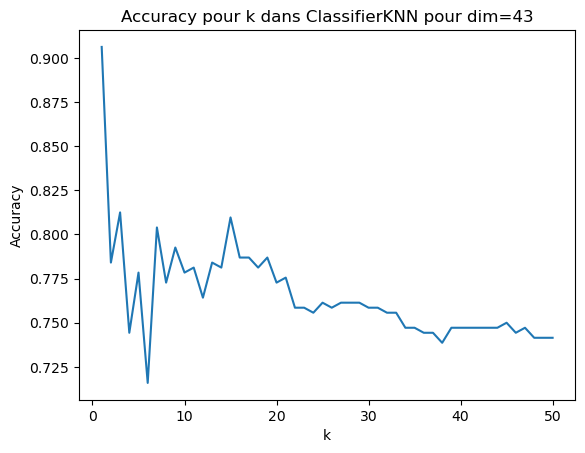

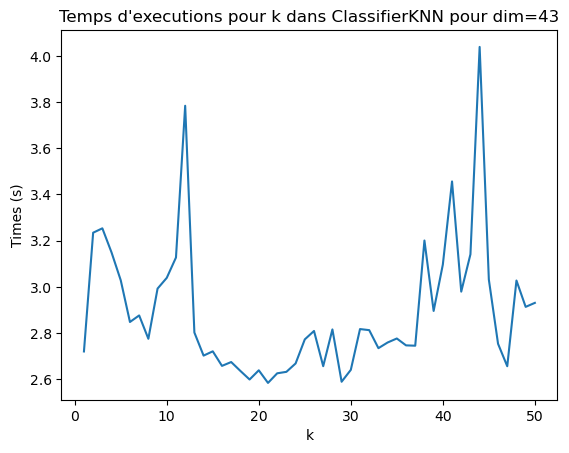

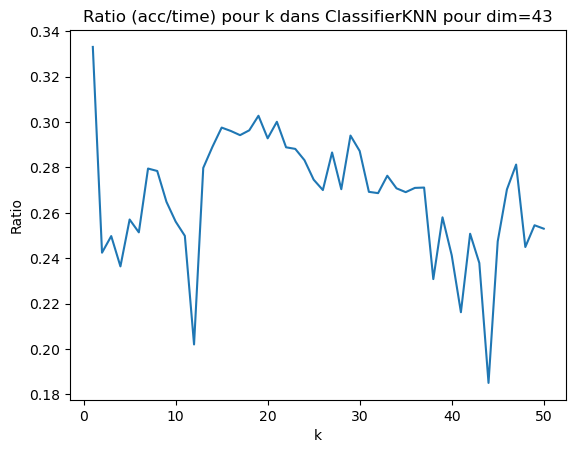

meilleur k: 1, acc: 0.90625, t_exec: 2.7202320098876953


In [15]:
np.random.seed(42)
import time
# on stocke les accuracies dans une liste :
accuracies_knn = []
times_knn = []
ratios_knn = []

# seuil max des valeurs de k à regarder:
increment = 1
seuil_k = 51

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,increment)]

dim = Xsynthese.shape[1]
c = cl.ClassifierKNN(dim, 1)

Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xsynthese, Ysynthese, 5, 0)

#print(Xtest,Ytest)
c.train(Xapp, Yapp)

for k in valeurs_k:
    c.k = k
    tic = time.time()
    acc = c.accuracy(Xtest, Ytest)
    toc = time.time()
    chrono = toc - tic
    
    accuracies_knn.append(acc)
    times_knn.append(chrono)
    ratios_knn.append(acc/chrono)
    print(f"k={k}\tacc={acc}\ttime={chrono}\tratio:{acc/chrono}")

# plots des accuracies
ut.plot2D(valeurs_k, accuracies_knn, "k", 'Accuracy', "Accuracy pour k dans ClassifierKNN pour dim=43")
ut.plot2D(valeurs_k, times_knn, "k", 'Times (s)', "Temps d'executions pour k dans ClassifierKNN pour dim=43")
ut.plot2D(valeurs_k, ratios_knn, "k", "Ratio", "Ratio (acc/time) pour k dans ClassifierKNN pour dim=43")

#trouver meilleur k
best_acc = max(accuracies_knn)
best_k = valeurs_k[accuracies_knn.index(best_acc)]
best_time = times_knn[accuracies_knn.index(best_acc)]
print(f"meilleur k: {best_k}, acc: {best_acc}, t_exec: {best_time}")

In [16]:
# init classifierKNN avec k optimal
print("Exemple de résultat: validation croisée avec un knn pour k=",1)
classif_KNN = cl.ClassifierKNN(dim,1)

(res_all, res_moy, res_sd) = ut.validation_croisee(classif_KNN, (Xsynthese, Ysynthese), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Exemple de résultat: validation croisée avec un knn pour k= 1
0  :  taille app.=  1591  taille test =  175  Accuracy:  0.9314285714285714
1  :  taille app.=  1589  taille test =  177  Accuracy:  0.9661016949152542
2  :  taille app.=  1589  taille test =  177  Accuracy:  0.8192090395480226
3  :  taille app.=  1590  taille test =  176  Accuracy:  0.9602272727272727
4  :  taille app.=  1589  taille test =  177  Accuracy:  0.9548022598870056
5  :  taille app.=  1589  taille test =  177  Accuracy:  0.8135593220338984
6  :  taille app.=  1590  taille test =  176  Accuracy:  0.9659090909090909
7  :  taille app.=  1589  taille test =  177  Accuracy:  0.9661016949152542
8  :  taille app.=  1589  taille test =  177  Accuracy:  0.943502824858757
9  :  taille app.=  1589  taille test =  177  Accuracy:  0.9491525423728814
Perf obtenues :  [0.9314285714285714, 0.9661016949152542, 0.8192090395480226, 0.9602272727272727, 0.9548022598870056, 0.8135593220338984, 0.9659090909090909, 0.9661016949152542, 0

### 1.2 Experimentation Perceptron

best poids_0: True
best learning rate :  0.0054
best accuracy :  0.9886685552407932
Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire : 88.74909806251526


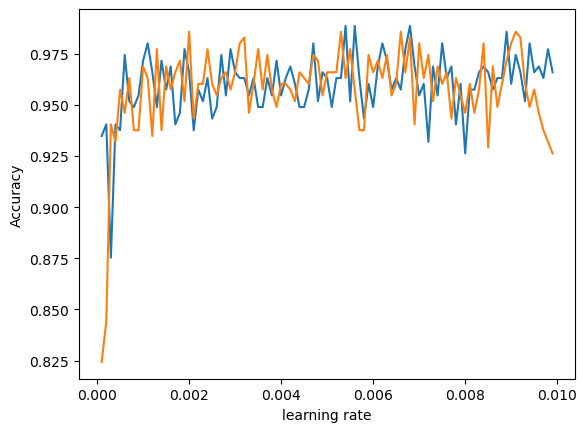

In [21]:
np.random.seed(42)
# on stocke les accuracies dans les listes :
acc_F = []
acc_T = []

# Trouver best Initialisation aléatoire et Learning rate
learning_rate = [eps*0.0001 for eps in range(1, 100, 1)]
nb_iter = 10

data_train, label_train, data_test, label_test = ut.crossval_strat(Xsynthese, Ysynthese, 5,1)

tic = time.time()

# Trouver best Initialisation aléatoire et Learning rate
for i in learning_rate:
    #Init True
    perceptron1 = cl.ClassifierPerceptron(dim, i, True)
    perceptron1.train(data_train, label_train)
    acc_T.append(perceptron1.accuracy(data_test, label_test))
    #Init False
    perceptron2 = cl.ClassifierPerceptron(dim, i, False)
    perceptron2.train(data_train, label_train)
    acc_F.append(perceptron2.accuracy(data_test, label_test))

# Trouver best accuracy 
best_percep_acc_T = max(acc_T_5d)
best_percep_acc_F = max(acc_F_5d)
best_percep_learning_rate = 0
best_percep_poids_0 = True

# Comparer 
if best_percep_acc_T > best_percep_acc_F:
    best_percep_poids_0 = True
    index = acc_T.index(best_percep_acc_T)
    best_percep_learning_rate = learning_rate[index]
    print("best poids_0: True")
    print("best learning rate : ", best_percep_learning_rate)
    print("best accuracy : ", best_percep_acc_T)
else:
    best_percep_poids_0 = False
    index = acc_F.index(best_percep_acc_F)
    best_percep_learning_rate = learning_rate[index]
    print("best poids_0: False")
    print("best learning rate : ", best_percep_learning_rate)
    print("best accuracy : ", best_percep_acc_F)
toc = time.time()
# Le temps pour trouver best learning rate et Init
times_percept = toc - tic

print("Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire :" , times_percept)
ut.plt.plot(learning_rate, acc_T)
ut.plt.plot(learning_rate, acc_F)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.show()

In [22]:
print("Exemple de résultat: validation croisée avec un perceptron")

classif_perceptrion = cl.ClassifierPerceptron(43,best_percep_learning_rate,best_percep_poids_0)

(res_all, res_moy, res_sd) = ut.validation_croisee(classif_perceptrion, (Xsynthese, Ysynthese), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Exemple de résultat: validation croisée avec un perceptron
0  :  taille app.=  1591  taille test =  175  Accuracy:  0.88
1  :  taille app.=  1589  taille test =  177  Accuracy:  0.9887005649717514
2  :  taille app.=  1589  taille test =  177  Accuracy:  0.9717514124293786
3  :  taille app.=  1590  taille test =  176  Accuracy:  1.0
4  :  taille app.=  1589  taille test =  177  Accuracy:  0.9943502824858758
5  :  taille app.=  1589  taille test =  177  Accuracy:  0.9830508474576272
6  :  taille app.=  1590  taille test =  176  Accuracy:  1.0
7  :  taille app.=  1589  taille test =  177  Accuracy:  1.0
8  :  taille app.=  1589  taille test =  177  Accuracy:  0.9830508474576272
9  :  taille app.=  1589  taille test =  177  Accuracy:  1.0
Perf obtenues :  [0.88, 0.9887005649717514, 0.9717514124293786, 1.0, 0.9943502824858758, 0.9830508474576272, 1.0, 1.0, 0.9830508474576272, 1.0]
Accuracy moyenne:  0.9800903954802258 	écart type:  0.03459509107106567


### 1.3 Perceptrion biais

best poids_0: False
best learning rate : 0.0051
best accuracy : 0.9263456090651558


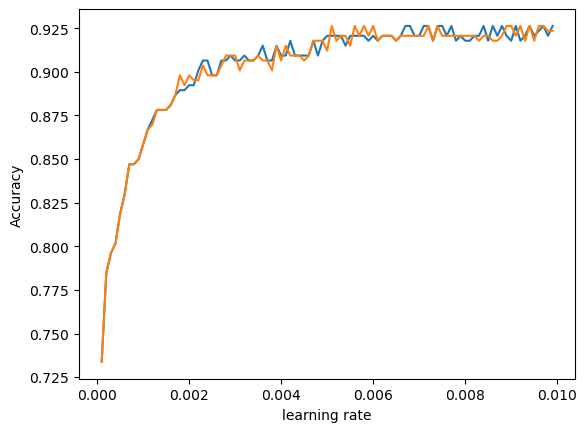

In [23]:
np.random.seed(42)
acc_biais_F = []
acc_biais_T = []
learning_rate = [eps*0.0001 for eps in range(1,100,1)]

# preparer donnees pour analyse
data_train, label_train, data_test, label_test = ut.crossval_strat(Xsynthese, Ysynthese, 5,1)
tic = time.time()

# parcourir Initialisation aléatoire et Learning rate
for i in learning_rate:
    perceptron1 = cl.ClassifierPerceptronBiais(dim, i, True)
    perceptron1.train(data_train, label_train)
    acc_biais_T.append(perceptron1.accuracy(data_test, label_test))
    
    perceptron2 = cl.ClassifierPerceptronBiais(dim, i, False)
    perceptron2.train(data_train, label_train)
    acc_biais_F.append(perceptron2.accuracy(data_test, label_test))

# determiner meilleur resultats
best_biais_acc_T = max(acc_biais_T)
best_biais_acc_F = max(acc_biais_F)

best_biais_poids_0 = best_biais_acc_T > best_biais_acc_F

best_biais_index = acc_biais_T.index(best_biais_acc_T) if best_biais_poids_0 else acc_biais_F.index(best_biais_acc_F)
best_biais_learning_rate = learning_rate[best_biais_index]
best_biais_acc = best_biais_acc_T if best_biais_poids_0 else best_biais_acc_F

# les afficher
print(f"best poids_0: {best_biais_poids_0}")
print(f"best learning rate : {best_biais_learning_rate}")
print(f"best accuracy : {best_biais_acc}")
    
toc = time.time()
time_percepBiais = toc - tic

ut.plt.plot(learning_rate, acc_biais_T)
ut.plt.plot(learning_rate, acc_biais_F)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.show()

In [24]:
print("Exemple de résultat: validation croisée avec un perceptron biais")

classif_perceptrion = cl.ClassifierPerceptronBiais(43,best_biais_learning_rate,best_biais_poids_0)

(res_all, res_moy, res_sd) = ut.validation_croisee(classif_perceptrion, (Xsynthese, Ysynthese), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Exemple de résultat: validation croisée avec un perceptron biais
0  :  taille app.=  1591  taille test =  175  Accuracy:  0.9028571428571428
1  :  taille app.=  1589  taille test =  177  Accuracy:  0.9661016949152542
2  :  taille app.=  1589  taille test =  177  Accuracy:  0.9096045197740112
3  :  taille app.=  1590  taille test =  176  Accuracy:  0.9659090909090909
4  :  taille app.=  1589  taille test =  177  Accuracy:  0.9887005649717514
5  :  taille app.=  1589  taille test =  177  Accuracy:  0.9209039548022598
6  :  taille app.=  1590  taille test =  176  Accuracy:  1.0
7  :  taille app.=  1589  taille test =  177  Accuracy:  0.9774011299435028
8  :  taille app.=  1589  taille test =  177  Accuracy:  0.9830508474576272
9  :  taille app.=  1589  taille test =  177  Accuracy:  0.9943502824858758
Perf obtenues :  [0.9028571428571428, 0.9661016949152542, 0.9096045197740112, 0.9659090909090909, 0.9887005649717514, 0.9209039548022598, 1.0, 0.9774011299435028, 0.9830508474576272, 0.99435

### 1.4 Arbre Decision

In [14]:
data_synthese_num = data_synthese_dqr_sansNom.copy(deep = True)
for i in range(17):
    resultat, liste_vals = cl.discretise(Xsynthese,Ysynthese,i+7)
    print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )
    #print(data_synthese_dqr_sansNom['enviroment_Total'].iloc[i])
    data_synthese_num.loc[data_synthese_dqr_sansNom[enviroment_columns[i]]<=resultat[0], enviroment_columns[i]] = 0
    data_synthese_num.loc[data_synthese_dqr_sansNom[enviroment_columns[i]]>resultat[0], enviroment_columns[i]] = 1

Xsynthese2 = np.array(data_synthese_num[enviroment_columns], dtype=float) # conversion de type pour une meilleure compatibilité

Seuil de coupure trouvé: 0.036 et son entropie: 0.38447
Seuil de coupure trouvé: 0.028 et son entropie: 0.36427
Seuil de coupure trouvé: 0.014 et son entropie: 0.33861
Seuil de coupure trouvé: 0.051 et son entropie: 0.37054
Seuil de coupure trouvé: 0.028 et son entropie: 0.38881
Seuil de coupure trouvé: 0.065 et son entropie: 0.35756
Seuil de coupure trouvé: 0.029 et son entropie: 0.45036
Seuil de coupure trouvé: 0.070 et son entropie: 0.78150
Seuil de coupure trouvé: 0.042 et son entropie: 0.52058
Seuil de coupure trouvé: 0.008 et son entropie: 0.52580
Seuil de coupure trouvé: 0.000 et son entropie: 0.96045
Seuil de coupure trouvé: 0.000 et son entropie: 0.96481
Seuil de coupure trouvé: 0.000 et son entropie: 0.93934
Seuil de coupure trouvé: 0.000 et son entropie: 0.98002
Seuil de coupure trouvé: 0.000 et son entropie: 0.98029
Seuil de coupure trouvé: 0.000 et son entropie: 0.97915
Seuil de coupure trouvé: 0.000 et son entropie: 0.97645


Exemple de résultat sur les données numériques: validation croisée avec les arbres de décisions
0  :  taille app.=  1591  taille test =  175  Accuracy:  0.9714285714285714
1  :  taille app.=  1589  taille test =  177  Accuracy:  0.9830508474576272
2  :  taille app.=  1589  taille test =  177  Accuracy:  0.9265536723163842
3  :  taille app.=  1590  taille test =  176  Accuracy:  0.9772727272727273
4  :  taille app.=  1589  taille test =  177  Accuracy:  0.9943502824858758
5  :  taille app.=  1589  taille test =  177  Accuracy:  0.9830508474576272
6  :  taille app.=  1590  taille test =  176  Accuracy:  0.9943181818181818
7  :  taille app.=  1589  taille test =  177  Accuracy:  0.9943502824858758
8  :  taille app.=  1589  taille test =  177  Accuracy:  0.9943502824858758
9  :  taille app.=  1589  taille test =  177  Accuracy:  0.9943502824858758
Perf obtenues :  [0.9714285714285714, 0.9830508474576272, 0.9265536723163842, 0.9772727272727273, 0.9943502824858758, 0.9830508474576272, 0.9943

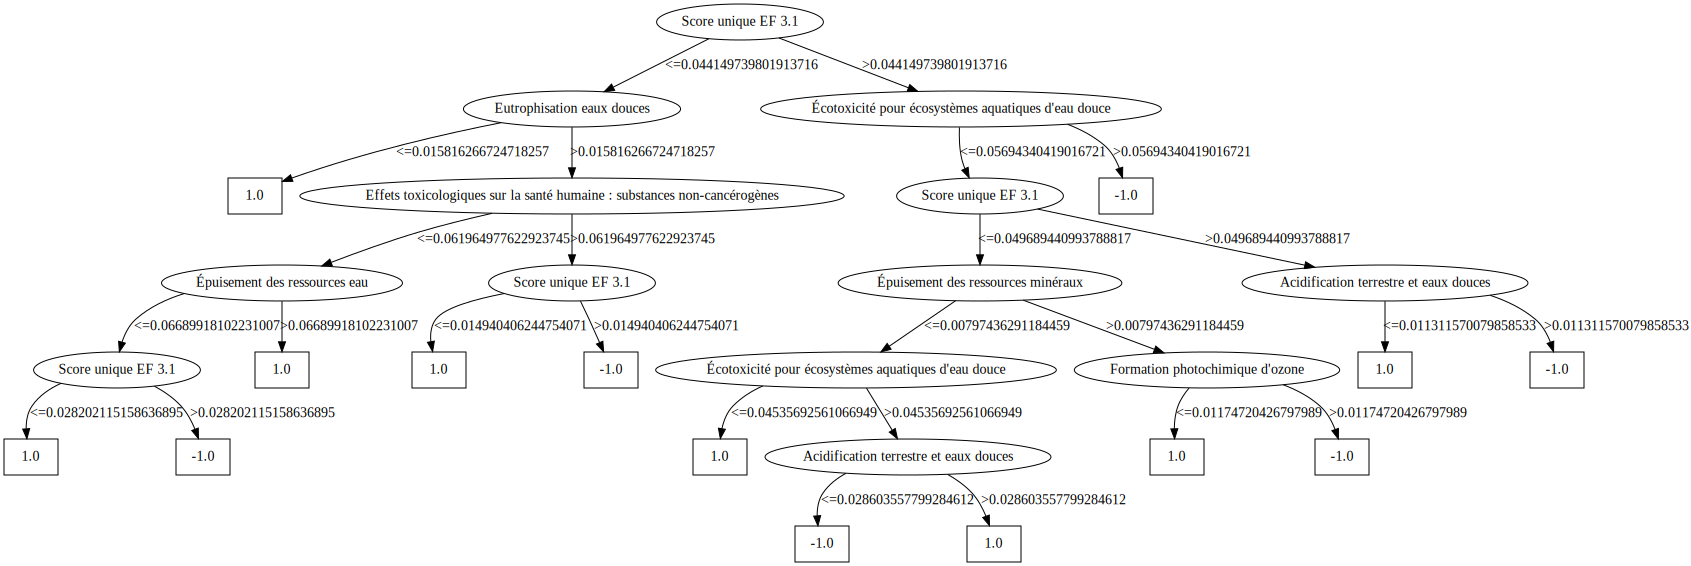

In [26]:
print("Exemple de résultat sur les données numériques: validation croisée avec les arbres de décisions")

arbre = cl.ClassifierArbreNumerique(len(enviroment_columns), 0.1, enviroment_columns)
# ce qui se passe:

(res_all, res_moy, res_sd) = ut.validation_croisee(arbre, (Xsynthese, Ysynthese), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

arbre.train(Xsynthese,Ysynthese)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
graphe_arbre

## 2. Apprentissage non-supervisé

### 2.1 Clustering

In [12]:
data_synthese_norm = data_synthese_dqr_sansNom.copy()

[[9, 27, 0.0317002962300006, 2],
 [31, 55, 0.03997523859166086, 3],
 [26, 34, 0.0594489517178476, 2],
 [56, 57, 0.06763289422515127, 5],
 [0, 8, 0.08188456536538052, 2],
 [23, 28, 0.156482886026767, 2],
 [19, 37, 0.23607120088641712, 2],
 [32, 58, 0.2528310104513814, 6],
 [30, 62, 0.2634879844224554, 7],
 [40, 59, 0.2815533666821223, 3],
 [2, 42, 0.29354748257250013, 2],
 [35, 64, 0.32895288914019116, 4],
 [11, 17, 0.3646203524311314, 2],
 [20, 60, 0.3936323980340887, 3],
 [10, 29, 0.39521120168569335, 2],
 [14, 33, 0.406609141252451, 2],
 [41, 63, 0.4703069539117734, 8],
 [4, 38, 0.48359884971235584, 2],
 [25, 39, 0.508754151014327, 2],
 [46, 72, 0.5096513837446955, 3],
 [61, 74, 0.541531231838367, 5],
 [22, 24, 0.5420774237694211, 2],
 [13, 70, 0.5565492417637026, 3],
 [73, 76, 0.5579062354257918, 4],
 [66, 75, 0.5739931460085271, 9],
 [68, 79, 0.5892995297932969, 12],
 [77, 80, 0.5916975707540142, 15],
 [71, 78, 0.5956878928023095, 12],
 [15, 16, 0.6151573970399046, 2],
 [18, 50, 0.

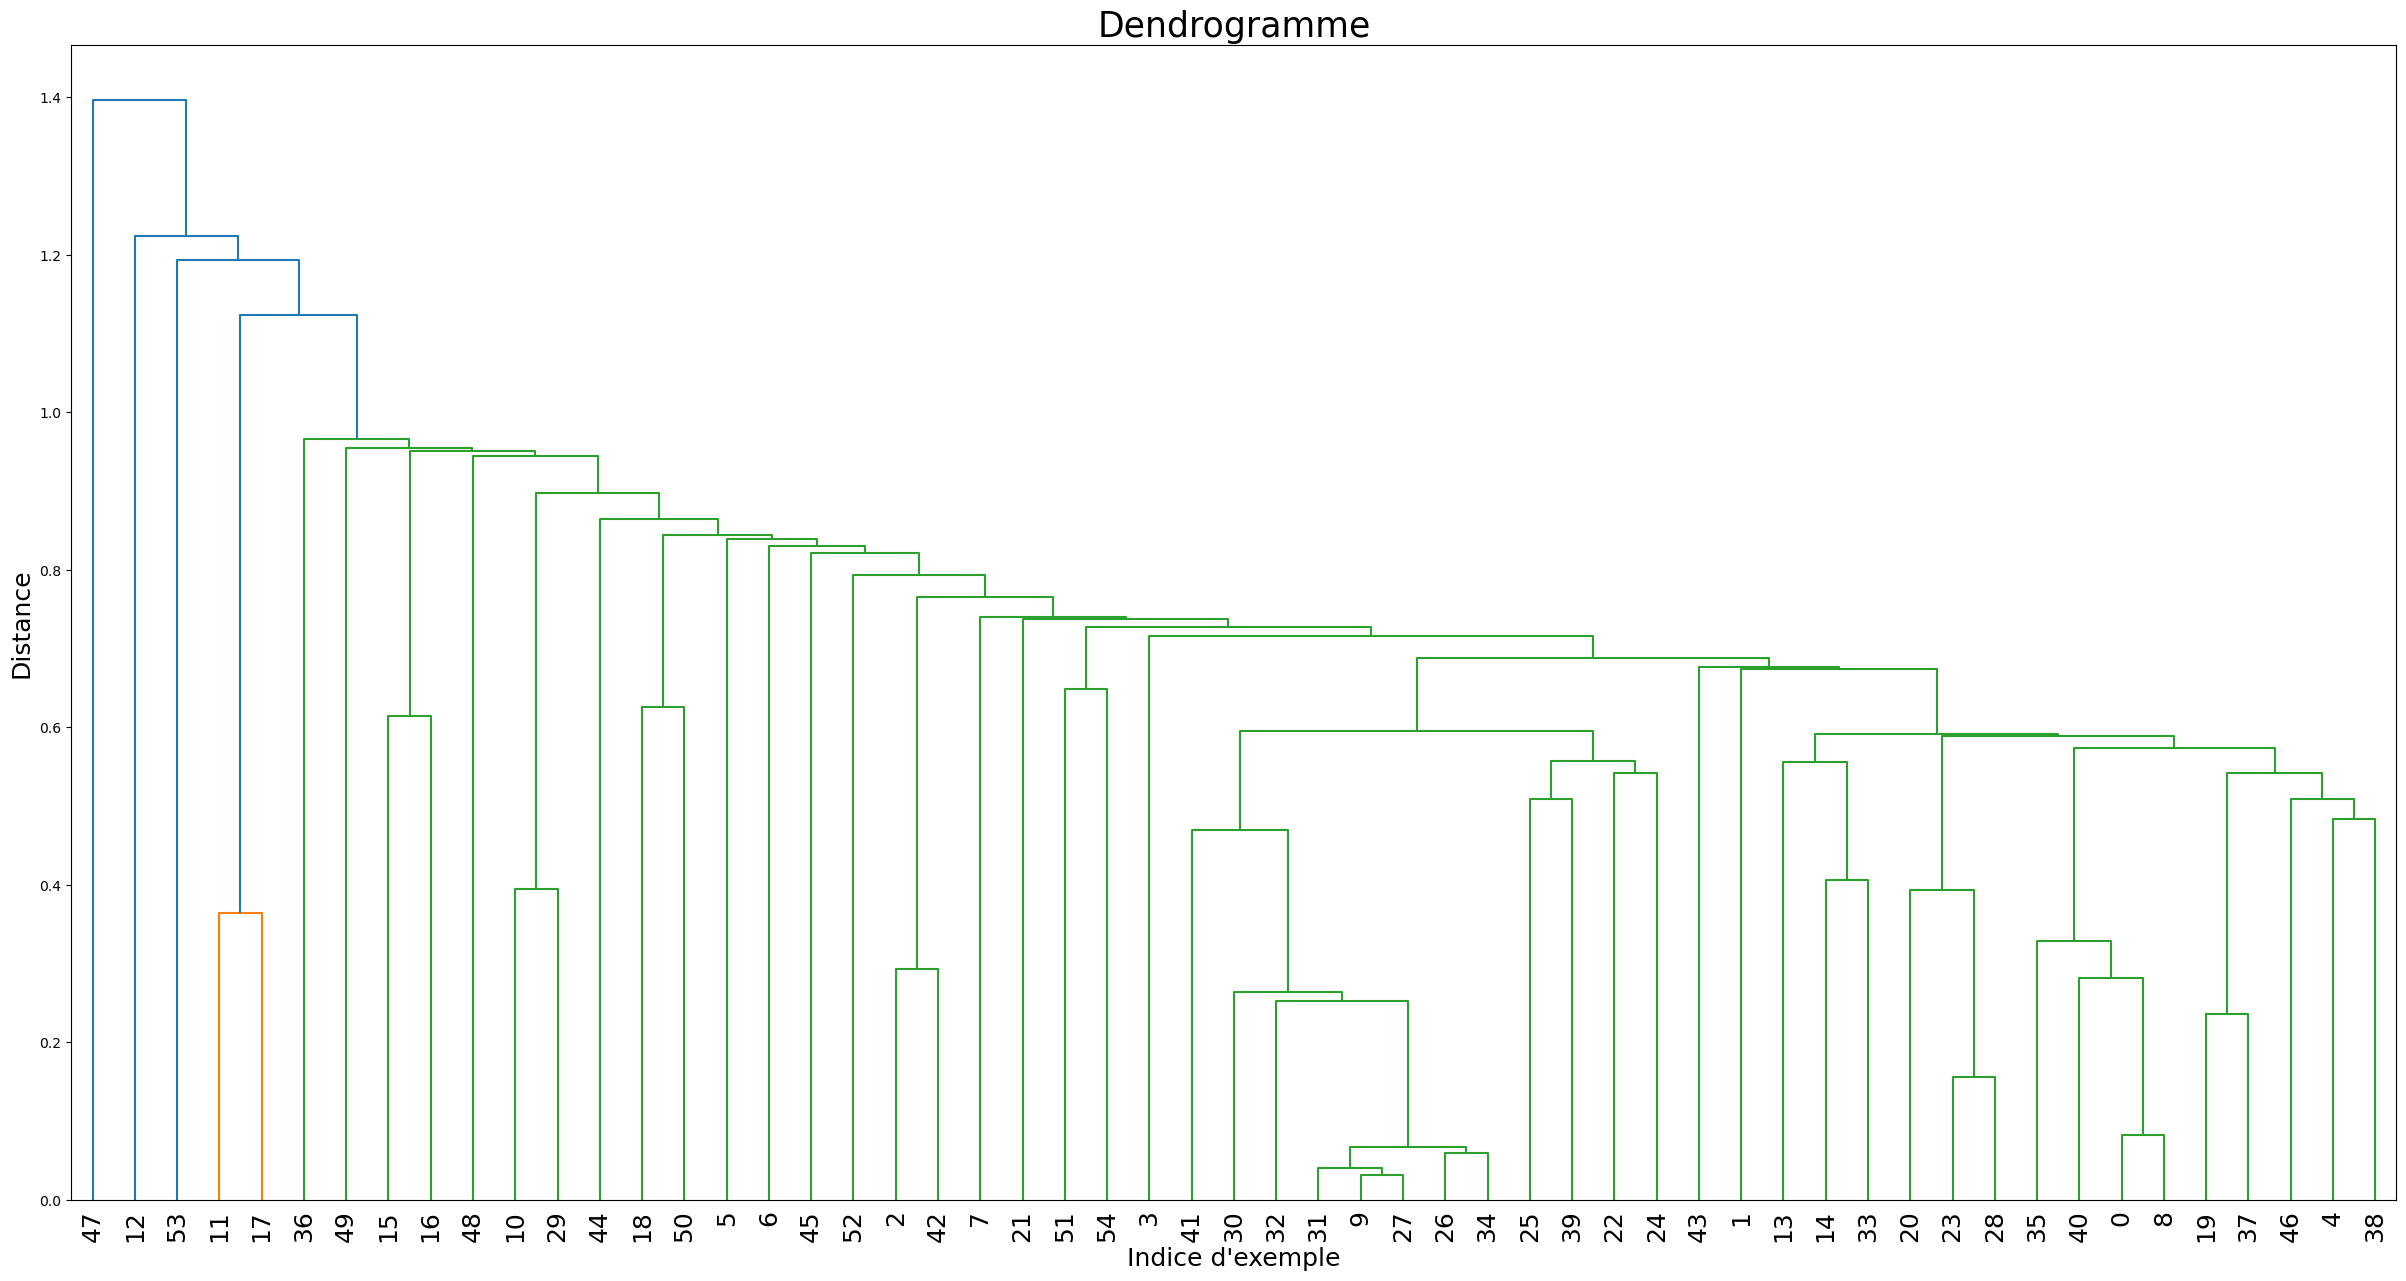

In [15]:
#unique_combinations = data_synthese_norm.drop_duplicates(subset=['Groupe d\'aliment', 'Sous-groupe d\'aliment'])
data_synthese_norm = data_synthese_dqr_sansNom.copy()
data_synthese_norm.drop(columns = ['enviroment_classe',"code saison","code avion","Livraison","DQR"],inplace=True)
#data_synthese_norm.head(10)
#"Groupe d'aliment","Sous-groupe d'aliment",

unique_combinations = data_synthese_norm.groupby(['Groupe d\'aliment', 'Sous-groupe d\'aliment']).mean().reset_index()

unique_labels = unique_combinations.apply(lambda row: ', '.join(row[:2].astype(str)), axis=1)
unique_combinations
unique_labels

unique_data = unique_combinations.iloc[:,2:]
clust.CHA(unique_data, "simple", False, True)
#plt.savefig("cha_simple.pdf", transparent=True, format="pdf")

In [16]:
data_synthese_norm.drop(columns = ['Groupe d\'aliment', 'Sous-groupe d\'aliment'],inplace=True)

### 2.2 K-Means

/home/tristan/Documents/S6/026/tme/projet-2/iads/Clustering.py:74: RuntimeWarning: Mean of empty slice.
  means.append(c.mean())
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


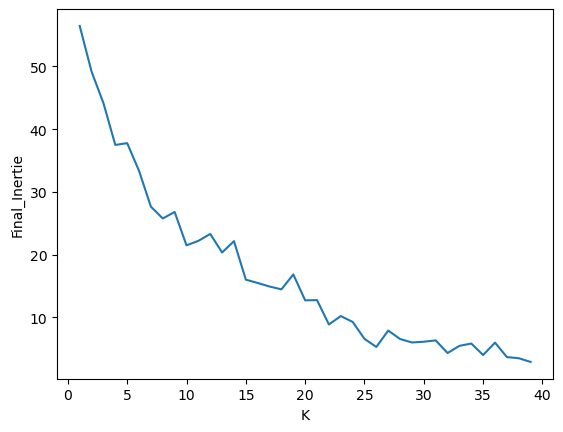

In [17]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée
l_finalInertie = []
l_k = []

for k in range(1,40):
    les_centres, l_affectation,final_inertie = clust.kmoyennes(k, unique_data, 0.05, 100)
    l_finalInertie.append(final_inertie)
    l_k.append(k)
    
ut.plt.plot(l_k, l_finalInertie)
ut.plt.ylabel('Final_Inertie')
ut.plt.xlabel("K")
ut.plt.show()

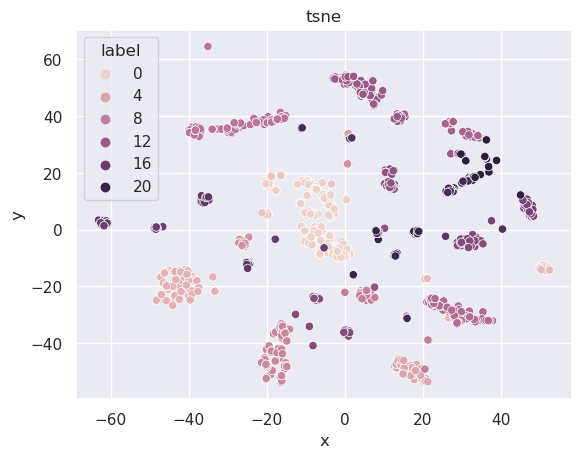

In [18]:
from sklearn.manifold import TSNE
import seaborn as sns
les_centres, l_affectation,final_inertie = clust.kmoyennes(22, data_synthese_norm, 0.05, 100)
#print(les_centres)
#[selected_rows] = data_synthese_norm.iloc[[0]].values.tolist()
#print(selected_rows)
#print(l_affectation)
x_values = []
y_values = []

for cluster in l_affectation.keys():
    for j in l_affectation[cluster]:
        [selected_rows] = data_synthese_norm.iloc[[j]].values.tolist()
        x_values.append(selected_rows)
        y_values.append(cluster)
#print(x_values)
#print(y_values)
x_values = np.array(x_values)

sns.set()
"""
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_values)
"""
# t-sne 
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_values)

#affichier
df = pd.DataFrame(x_tsne, columns=['x', 'y'])
df['label'] = y_values
sns.scatterplot(x="x", y="y", hue="label", data=df)
plt.title('tsne')
#plt.savefig("kmeans_ingredients.pdf", transparent=True, format="pdf")
plt.show()


on prends k = 22

# Data étapes

## Prétraitement des données

Nous voulons prédire si c’est nocif pour l’environnement en faisant 6 étapes, donc il faut créer un nouveau DataFrame avec 6 colonnes et 1 pour classe

In [19]:
l_etape = ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', 'Consommation']
data_etapes_dqr = (data_etapes.loc[data_etapes['DQR'] <= 3]).reset_index(drop=True)
#On choisit les colonnes sur les étapes
etapes_col = data_etapes_dqr.columns[8:]
data_etapes_dqr_sansNom = data_etapes_dqr[etapes_col]
data_etapes_dqr_sansNom2 = data_etapes_dqr_sansNom.copy(deep=True)
data_etapes_dqr_sansNom2.drop(columns = ['DQR Overall','P','TiR','GR','TeR'],inplace = True)
data_etapes_dqr_sansNom = data_etapes_dqr_sansNom2
data_etapes_dqr_sansNom.head(10)
#print(len(data_etapes_dqr))

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total,Agriculture.1,Transformation.1,Emballage.1,...,Supermarché et distribution.15,Consommation.15,Total.15,Agriculture.16,Transformation.16,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16
0,0.654812,0.500987,0.024443,0.046250,0.004981,0.000407,1.231879,4.569259,1.492415,0.290252,...,1.668472,0.006188,315.057163,0.070159,0.014994,0.001043,0.000899,0.000460,0.000002,0.087558
1,0.654812,0.500987,0.024443,0.046250,0.004981,0.000407,1.231879,4.569259,1.492415,0.290252,...,1.668472,0.006188,315.057163,0.070159,0.014994,0.001043,0.000899,0.000460,0.000002,0.087558
2,0.654812,0.500987,0.024443,0.019621,0.004981,0.000407,1.205251,4.569259,1.492415,0.290252,...,1.668472,0.006188,312.632276,0.070159,0.014994,0.001043,0.000593,0.000460,0.000002,0.087251
3,0.134970,0.062260,0.010959,0.009232,0.004832,0.000000,0.222253,1.438076,0.296488,0.110054,...,1.618417,0.000000,23.361106,0.003197,0.012501,0.000512,0.000414,0.000447,0.000000,0.017071
4,0.000000,0.198804,0.010071,0.008654,0.004536,0.000000,0.222065,0.000000,0.903185,0.101119,...,1.593503,0.000000,14.722475,0.000000,0.047031,0.000471,0.000388,0.000440,0.000000,0.048330
5,0.135678,0.034728,0.019549,0.017104,0.009270,0.002455,0.218784,1.119950,0.187728,0.177364,...,3.234067,0.925256,25.548619,0.003097,0.001098,0.002137,0.001026,0.000918,0.000263,0.008539
6,0.654812,0.500987,0.024443,0.019621,0.004981,0.000407,1.205251,4.569259,1.492415,0.290252,...,1.668472,0.006188,312.632276,0.070159,0.014994,0.001043,0.000593,0.000460,0.000002,0.087251
7,0.046245,0.000000,0.019549,0.008800,0.004832,0.000000,0.079425,0.298053,0.000000,0.177364,...,1.618417,0.000000,10.826810,0.014531,0.000000,0.002137,0.000395,0.000447,0.000000,0.017509
8,0.654812,0.500987,0.024443,0.019621,0.004981,0.000407,1.205251,4.569259,1.492415,0.290252,...,1.668472,0.006188,312.632276,0.070159,0.014994,0.001043,0.000593,0.000460,0.000002,0.087251
9,0.199359,0.027155,0.010071,0.008999,0.004536,0.000000,0.250121,1.450746,0.101601,0.101119,...,1.593503,0.000000,22.932291,0.004386,0.000779,0.000471,0.000402,0.000440,0.000000,0.006478


In [20]:
#Créer un nouveau DataFrame a juste 6 colonnes sur les étapes; les valeurs de chaque colonne est la somme de 17 categories
data_etapes_6D = data_etapes_dqr_sansNom[l_etape].copy()
for col in l_etape:
    l_col = [col+'.'+ str(i) for i in range(1,17)] + [col]
    #print(data_etapes_dqr_sansNom[l_col].sum())
    data_etapes_6D[col] = data_etapes_dqr_sansNom[l_col].sum(axis=1)

In [21]:
# conversion de type pour une meilleure compatibilité
data_etapes_6D['environement classe'] = data_synthese_dqr_sansNom['enviroment_classe']
X6D = np.array(data_etapes_6D[l_etape], dtype=float)
Y6D = np.array(data_etapes_6D['environement classe'], dtype=float)
print(X6D.shape)
print(Y6D.shape)
data_etapes_6D.head(10)
data_etape_norm = clust.normalisation(data_etapes_6D[l_etape])
data_etape_norm.head(10)
X6D_norm = np.array(data_etape_norm, dtype=float)

(1766, 6)
(1766,)


In [22]:
len(data_etapes_6D[data_etapes_6D['environement classe'] == -1] )

1027

## 1. Apprentissage supervisé

### 1.1 KNN

k=1	acc=0.90625	time=2.8714890480041504	ratio:0.31560280566972587
k=2	acc=0.875	time=2.8303189277648926	ratio:0.30915243911787316
k=3	acc=0.9005681818181818	time=2.884554862976074	ratio:0.31220351998749674
k=4	acc=0.8778409090909091	time=2.604534149169922	ratio:0.3370433477981778
k=5	acc=0.8920454545454546	time=2.841525077819824	ratio:0.3139319309579634
k=6	acc=0.8835227272727273	time=2.9640989303588867	ratio:0.2980746419168109
k=7	acc=0.90625	time=3.005558967590332	ratio:0.3015246114856879
k=8	acc=0.8948863636363636	time=2.9954302310943604	ratio:0.2987505281701797
k=9	acc=0.9005681818181818	time=2.8664870262145996	ratio:0.31417137896746256
k=10	acc=0.8977272727272727	time=2.847689151763916	ratio:0.3152476358492999
k=11	acc=0.8977272727272727	time=2.8308846950531006	ratio:0.3171189820256644
k=12	acc=0.8977272727272727	time=2.9081900119781494	ratio:0.3086893459608023
k=13	acc=0.8977272727272727	time=2.808879852294922	ratio:0.3196033009364242
k=14	acc=0.8977272727272727	time=2.6474399566

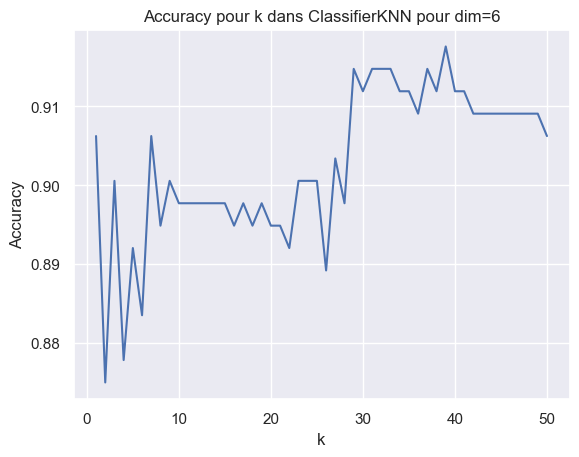

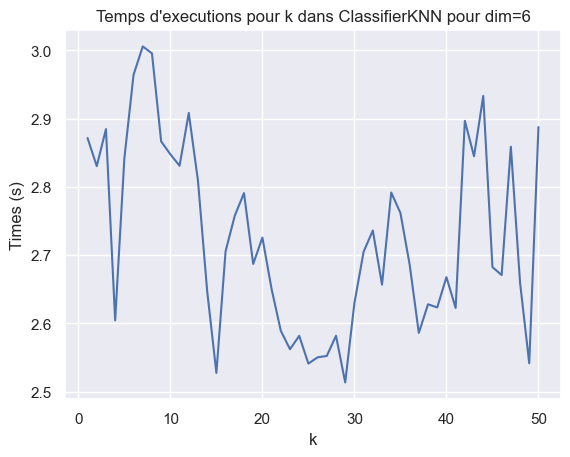

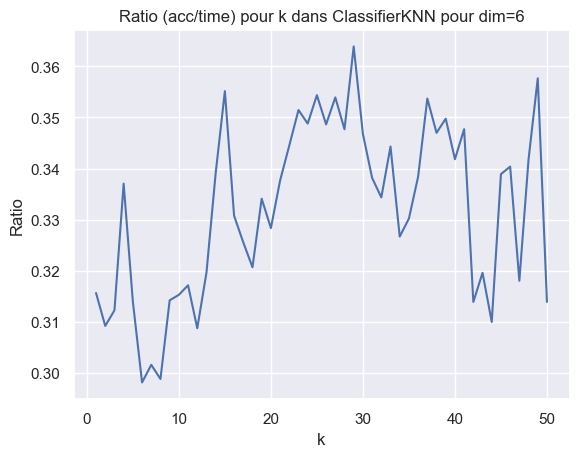

meilleur k: 39, acc: 0.9176136363636364, t_exec: 2.895676851272583


In [78]:
np.random.seed(42)
import time
# on stocke les accuracies dans une liste :
accuracies_knn_6d = []
times_knn_6d = []
ratios_knn_6d = []

# seuil max des valeurs de k à regarder:
increment = 1
seuil_k = 51

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,increment)]

dim = X6D.shape[1]
c = cl.ClassifierKNN(dim, 1)

Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X6D, Y6D, 5, 0)

#print(Xtest,Ytest)
c.train(Xapp, Yapp)

for k in valeurs_k:
    c.k = k
    tic = time.time()
    acc = c.accuracy(Xtest, Ytest)
    toc = time.time()
    chrono = toc - tic
    
    accuracies_knn_6d.append(acc)
    times_knn_6d.append(chrono)
    ratios_knn_6d.append(acc/chrono)
    print(f"k={k}\tacc={acc}\ttime={chrono}\tratio:{acc/chrono}")

# plots des accuracies
ut.plot2D(valeurs_k, accuracies_knn_6d, "k", 'Accuracy', "Accuracy pour k dans ClassifierKNN pour dim=6")
ut.plot2D(valeurs_k, times_knn_6d, "k", 'Times (s)', "Temps d'executions pour k dans ClassifierKNN pour dim=6")
ut.plot2D(valeurs_k, ratios_knn_6d, "k", "Ratio", "Ratio (acc/time) pour k dans ClassifierKNN pour dim=6")

#trouver meilleur k
best_acc = max(accuracies_knn_6d)
best_k = valeurs_k[accuracies_knn_6d.index(best_acc)]
best_time = times_knn[accuracies_knn_6d.index(best_acc)]
print(f"meilleur k: {best_k}, acc: {best_acc}, t_exec: {best_time}")

Accuracy moyenne: 0.9332237508254458
Ecart type: 0.03356339176832957
Temps de validation: 15.708106517791748


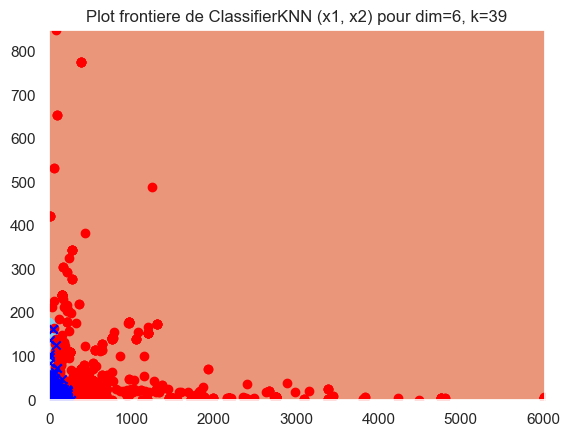

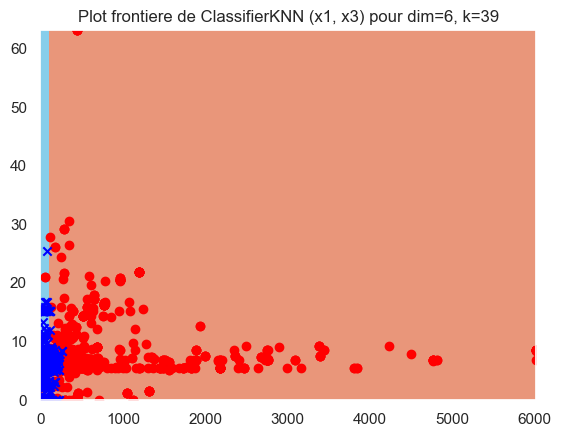

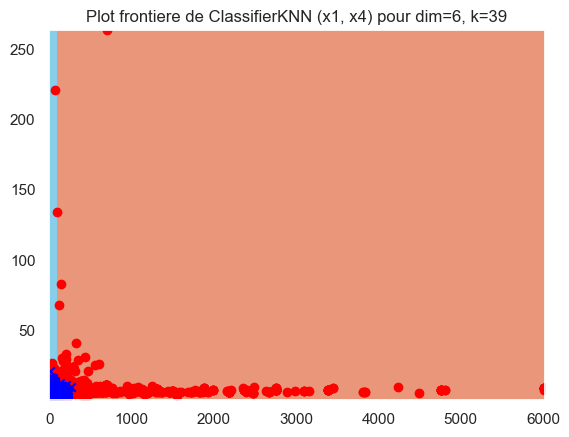

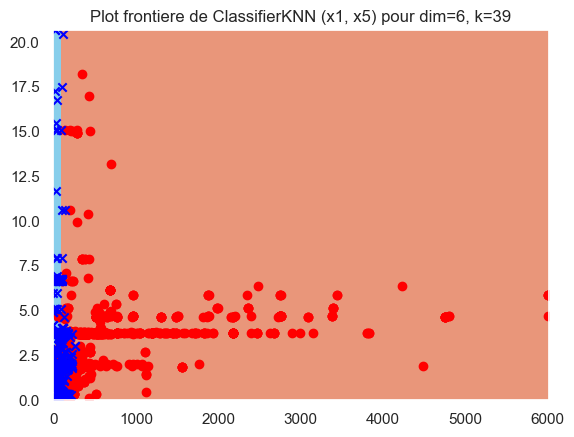

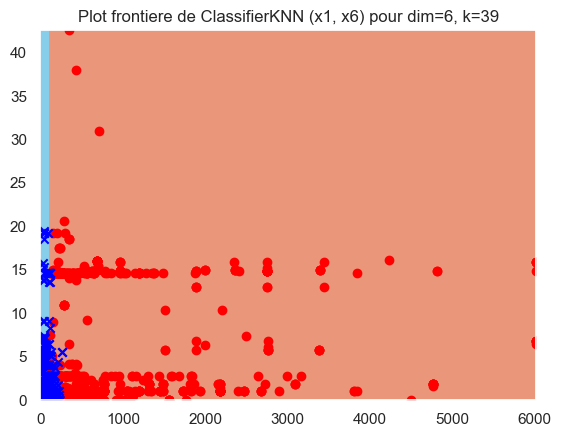

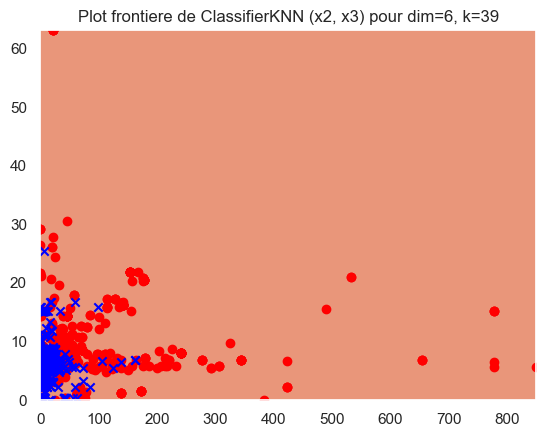

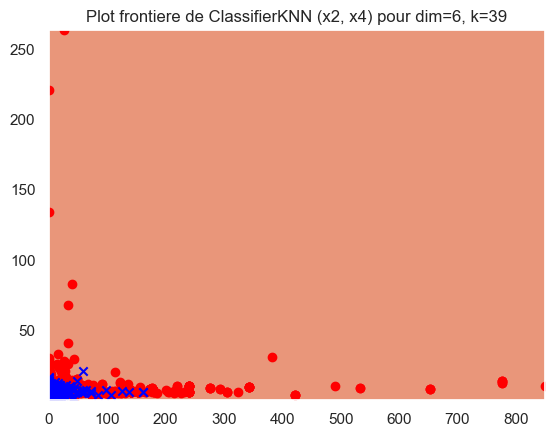

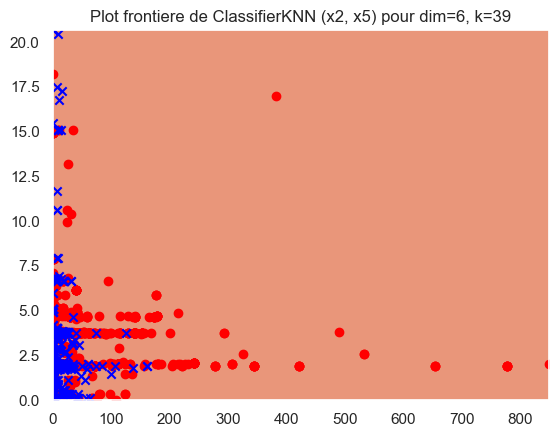

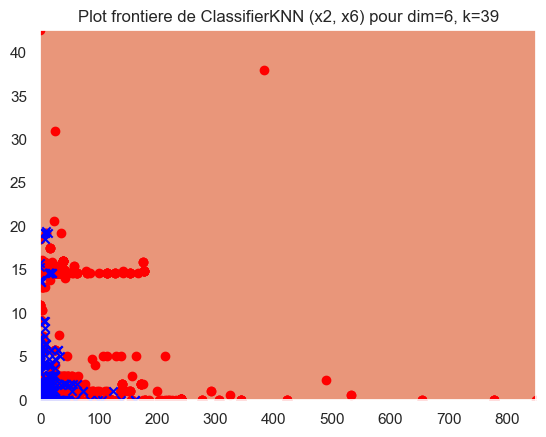

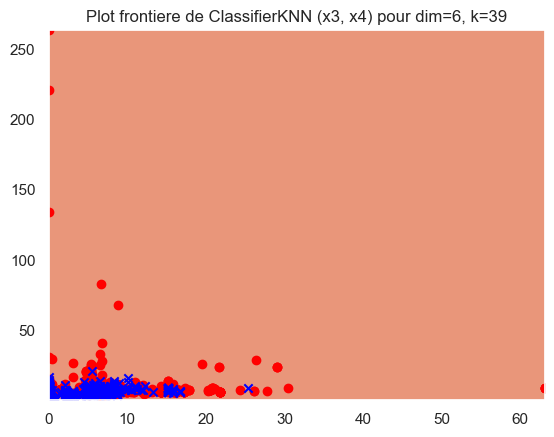

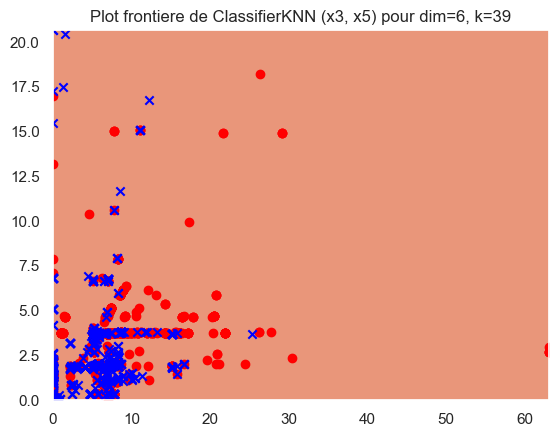

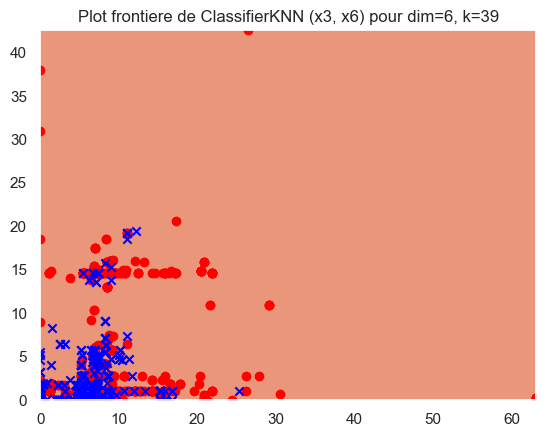

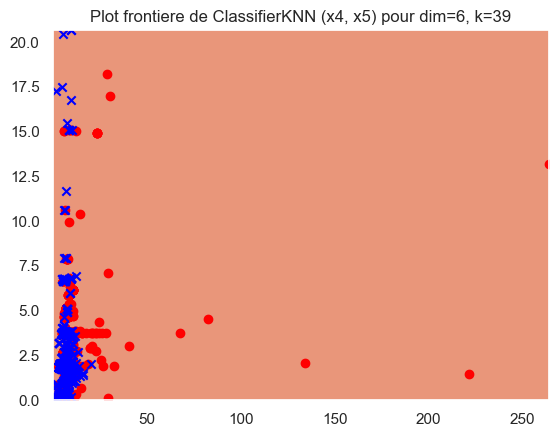

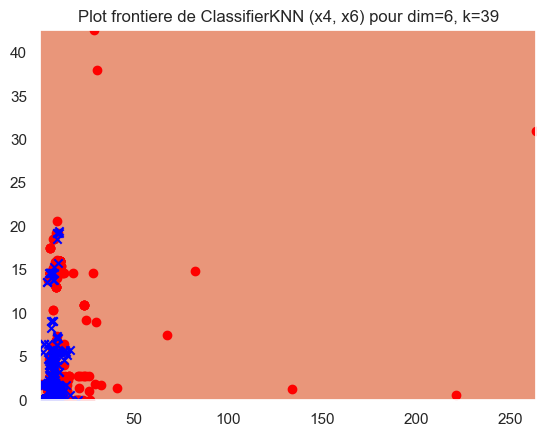

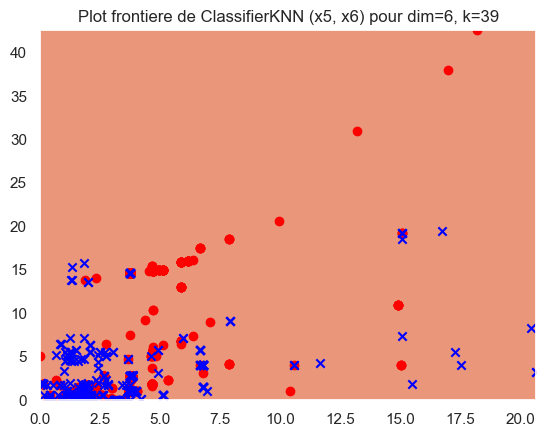

In [82]:
# init classifierKNN avec k optimal
classifierKNN = cl.ClassifierKNN(6, best_k)
acc_knn_6d = []
nb_iter = 10
temps_knn_validation_6d = 0

# realiser test de validation croisee en 10
for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X6D, Y6D, nb_iter, i)
    
    tic = time.time()
    classifierKNN.train(data_train, label_train)
    acc_knn_6d.append(classifierKNN.accuracy(data_test, label_test))
    toc = time.time()
    
    temps_knn_validation_6d += toc - tic

# analyser statistiques sur l'entrainement
(acc_knn_mean_6d,acc_knn_ecartType_6d) = ut.analyse_perfs(acc_knn_6d)
print(f"Accuracy moyenne: {acc_knn_mean_6d}")
print(f"Ecart type: {acc_knn_ecartType_6d}")
print(f"Temps de validation: {temps_knn_validation_6d}")

X6D_t = np.transpose(X6D)

# afficher les 10 combinaisons possibles de variables de x
for i in range(0, 6):
    for j in range(i+1, 6):
        #print(f"Plot x{i+1}, x{j+1}")
        #ut.plt.legend([f"x{i+1}", f"x{j+1}"])
        ut.plot_frontiere_ND(X6D, Y6D, classifierKNN, 6, i, j, 30)
        ut.plt.title(f"Plot frontiere de ClassifierKNN (x{i+1}, x{j+1}) pour dim=6, k={best_k}")
        ut.plot2DSet(np.transpose(ut.zip_x(X6D_t, i, j)), Y6D)
        ut.plt.show()

### 1.2 Perceptron

best poids_0: False
best learning rate :  0.0037
best accuracy :  0.9887005649717514
Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire : 154.20606803894043


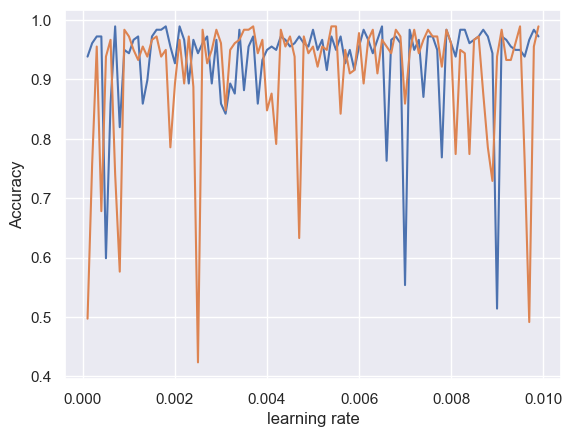

In [79]:
np.random.seed(42)
# on stocke les accuracies dans les listes :
acc_F_6d = []
acc_T_6d = []

# Trouver best Initialisation aléatoire et Learning rate
learning_rate = [eps*0.0001 for eps in range(1, 100, 1)]
nb_iter = 10

data_train, label_train, data_test, label_test = ut.crossval_strat(X6D, Y6D, nb_iter,1)

tic = time.time()

# Trouver best Initialisation aléatoire et Learning rate
for i in learning_rate:
    #Init True
    perceptron1 = cl.ClassifierPerceptron(dim, i, True)
    perceptron1.train(data_train, label_train)
    acc_T_6d.append(perceptron1.accuracy(data_test, label_test))
    #Init False
    perceptron2 = cl.ClassifierPerceptron(dim, i, False)
    perceptron2.train(data_train, label_train)
    acc_F_6d.append(perceptron2.accuracy(data_test, label_test))

# Trouver best accuracy 
best_percep_acc_T_6d = max(acc_T_6d)
best_percep_acc_F_6d = max(acc_F_6d)
best_percep_learning_rate_6d = 0
best_percep_poids_0_6d = True

# Comparer 
if best_percep_acc_T_6d > best_percep_acc_F_6d:
    best_percep_poids_0_6d = True
    index = acc_T_6d.index(best_percep_acc_T_6d)
    best_percep_learning_rate_6d = learning_rate[index]
    print("best poids_0: True")
    print("best learning rate : ", best_percep_learning_rate_6d)
    print("best accuracy : ", best_percep_acc_T_6d)
else:
    best_percep_poids_0_6d = False
    index = acc_F_6d.index(best_percep_acc_F_6d)
    best_percep_learning_rate_6d = learning_rate[index]
    print("best poids_0: False")
    print("best learning rate : ", best_percep_learning_rate_6d)
    print("best accuracy : ", best_percep_acc_F_6d)
toc = time.time()
# Le temps pour trouver best learning rate et Init
times_percept_6d = toc - tic

print("Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire :" , times_percept_6d)
ut.plt.plot(learning_rate, acc_T_6d)
ut.plt.plot(learning_rate, acc_F_6d)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.show()

Accuracy moyenne: 0.8102513023699466
Ecart type: 0.08947610991317086
time_percep_validation croisée en 10 : 7.134636402130127


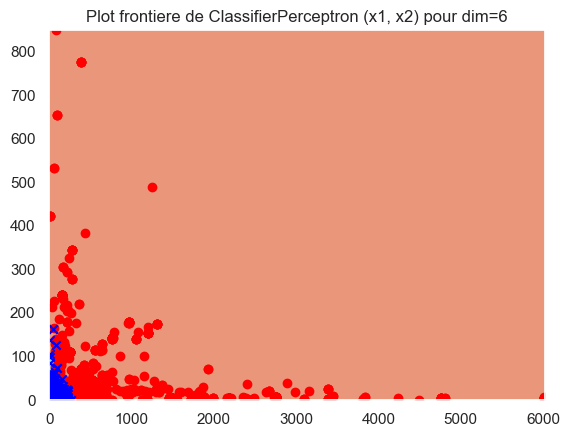

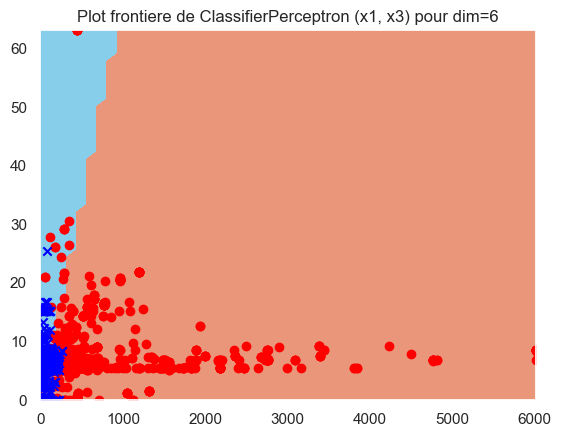

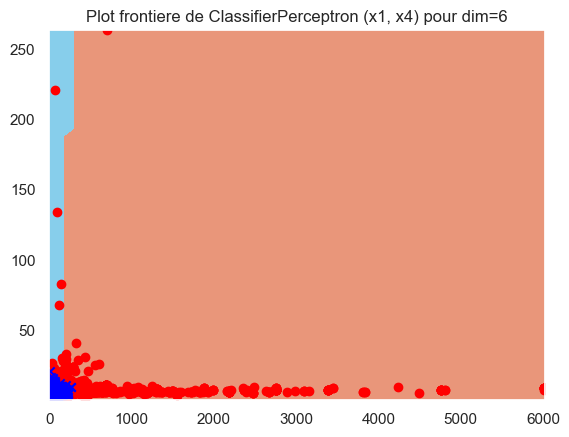

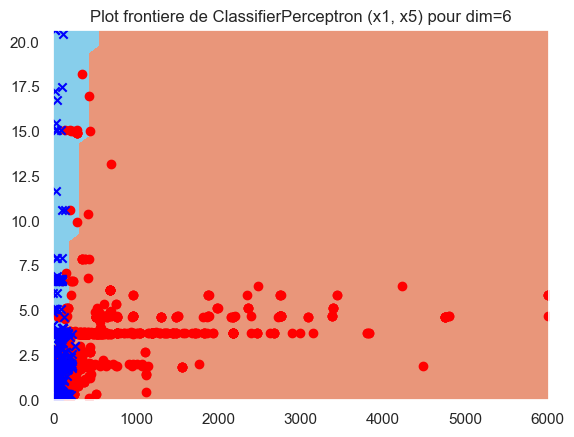

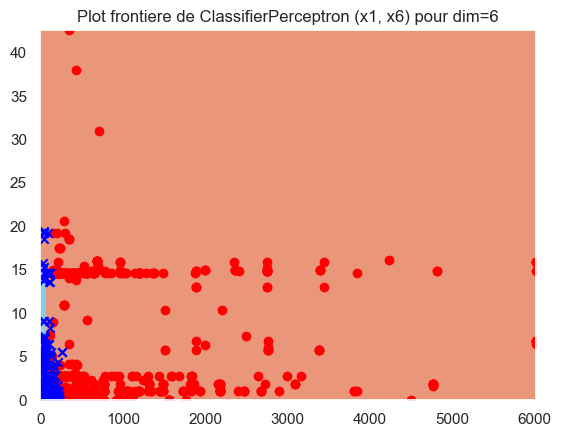

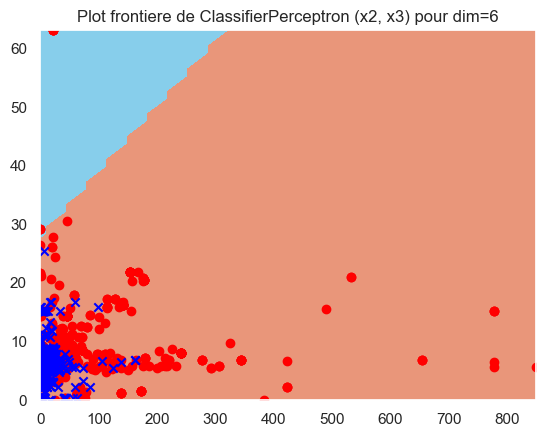

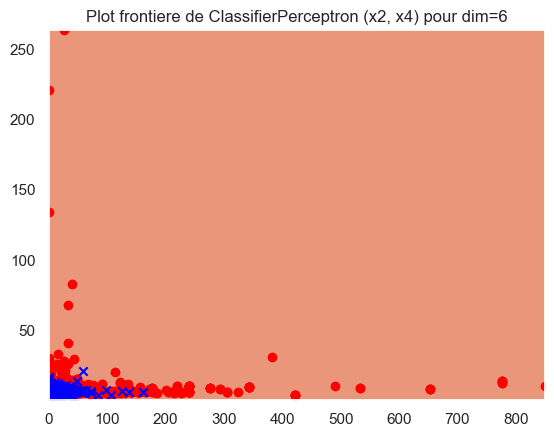

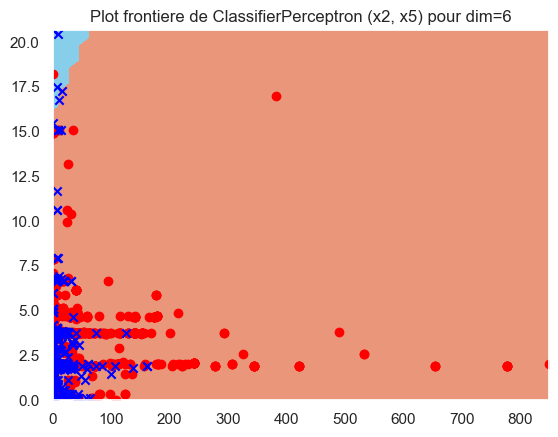

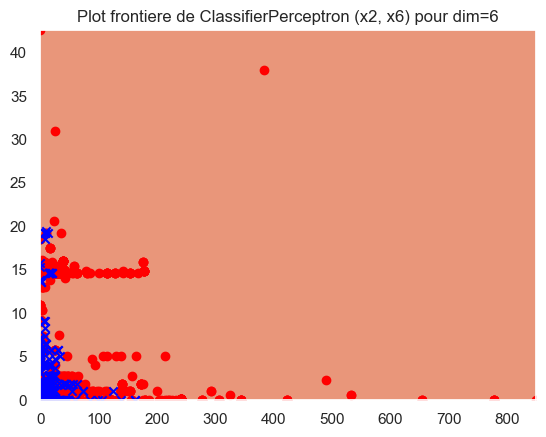

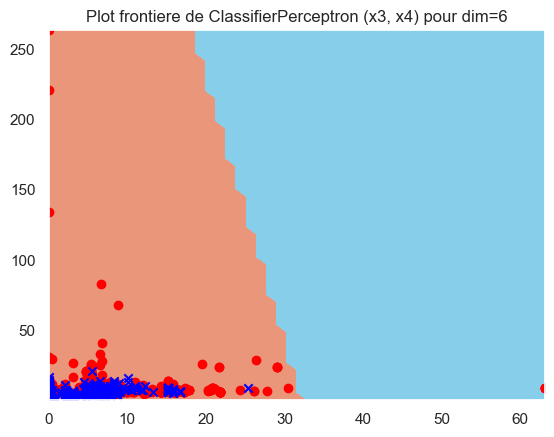

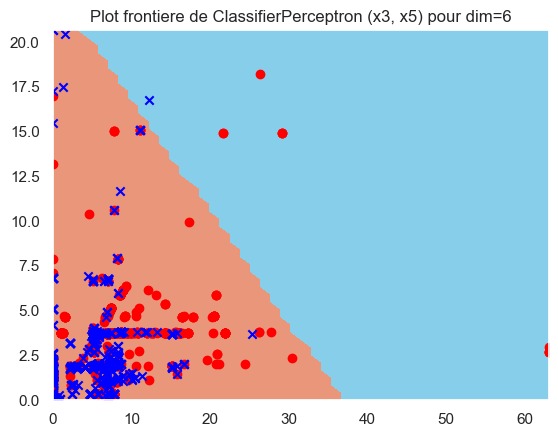

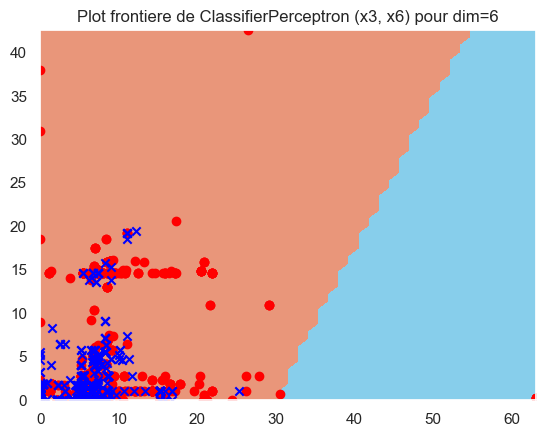

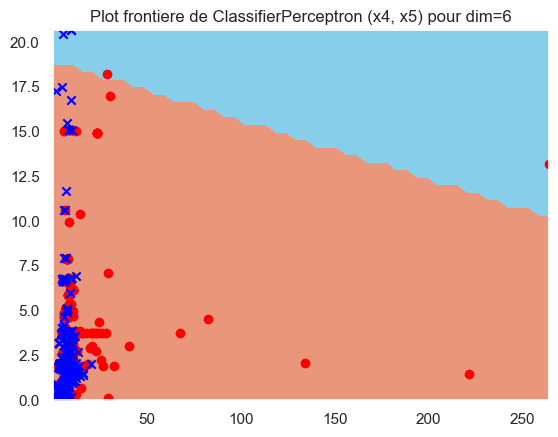

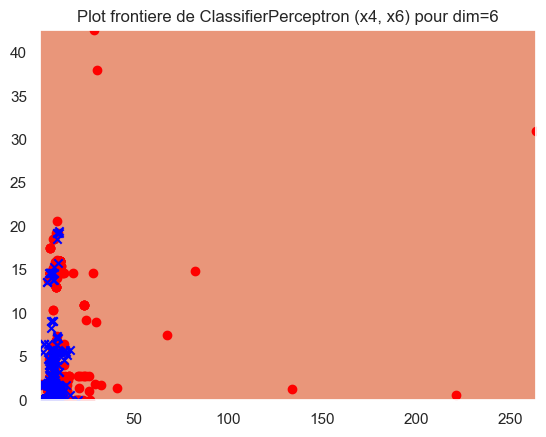

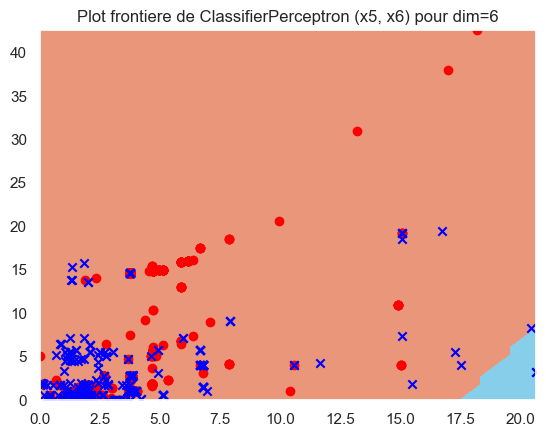

In [81]:
np.random.seed(42)
acc_percep_6d = []
perceptron1 = cl.ClassifierPerceptron(6, best_percep_learning_rate_6d, best_percep_poids_0_6d)

time_percep_validation_6d = 0

#réaliser une validation croisée en 10 
for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X6D,Y6D,nb_iter, i)
    
    tic = time.time()
    perceptron1.train(data_train, label_train)
    acc_percep_6d.append(perceptron1.accuracy(data_test,label_test))
    toc = time.time()
    time_percep_validation_6d += toc-tic

#print(acc_percep_5d)
(acc_percep_mean_6d,acc_percep_ecartType_6d) = ut.analyse_perfs(acc_percep_6d)
print(f"Accuracy moyenne: {acc_percep_mean_6d}")
print(f"Ecart type: {acc_percep_ecartType_6d}")
print(f"time_percep_validation croisée en 10 : {time_percep_validation_6d}")

X6D_t = np.transpose(X6D)
# afficher resultats frontiere
for i in range(0, 6):
    for j in range(i+1, 6):
        #print(f"Plot x{i+1}, x{j+1}")
        ut.plot_frontiere_ND(X6D, Y6D, perceptron1, 6, i, j, 50)
        ut.plt.title(f"Plot frontiere de ClassifierPerceptron (x{i+1}, x{j+1}) pour dim=6")
        ut.plot2DSet(np.transpose(ut.zip_x(X6D_t, i, j)), Y6D)
        ut.plt.show()

### 1.3 Perceptron biais

best poids_0: False
best learning rate : 0.005
best accuracy : 0.9887005649717514


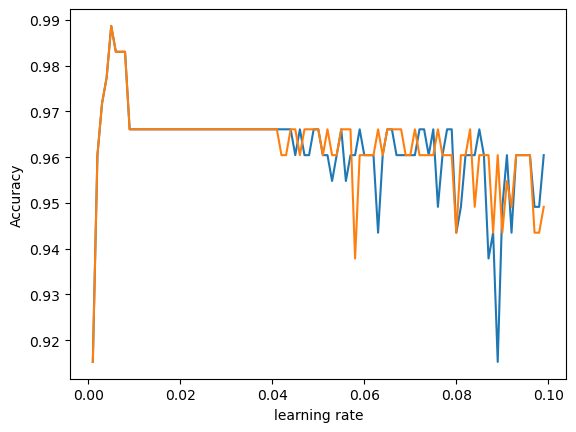

In [17]:
import time
np.random.seed(42)
acc_biais_F_6d = []
acc_biais_T_6d = []
learning_rate = [eps*0.001 for eps in range(1,100,1)]

nb_iter = 10

data_train, label_train, data_test, label_test = ut.crossval_strat(X6D_norm, Y6D, nb_iter,1)
tic = time.time()

# parcourir Initialisation aléatoire et Learning rate
for i in learning_rate:
    #print(i)
    perceptron1 = cl.ClassifierPerceptronBiais(6, i, True)
    perceptron1.train(data_train, label_train)
    #print("1",perceptron1.accuracy(data_test, label_test))
    acc_biais_T_6d.append(perceptron1.accuracy(data_test, label_test))
    
    perceptron2 = cl.ClassifierPerceptronBiais(6, i, False)
    perceptron2.train(data_train, label_train)
    #print("2",perceptron2.accuracy(data_test, label_test))
    acc_biais_F_6d.append(perceptron2.accuracy(data_test, label_test))

# determiner meilleur resultats
best_biais_acc_T_6d = max(acc_biais_T_6d)
best_biais_acc_F_6d = max(acc_biais_F_6d)

best_biais_poids_0_6d = best_biais_acc_T_6d > best_biais_acc_F_6d

best_biais_index_6d = acc_biais_T_6d.index(best_biais_acc_T_6d) if best_biais_poids_0_6d else acc_biais_F_6d.index(best_biais_acc_F_6d)
best_biais_learning_rate_6d = learning_rate[best_biais_index_6d]
best_biais_acc_6d = best_biais_acc_T_6d if best_biais_poids_0_6d else best_biais_acc_F_6d

# les afficher
print(f"best poids_0: {best_biais_poids_0_6d}")
print(f"best learning rate : {best_biais_learning_rate_6d}")
print(f"best accuracy : {best_biais_acc_6d}")
    
toc = time.time()
time_percepBiais_6d = toc - tic

ut.plt.plot(learning_rate, acc_biais_T_6d)
ut.plt.plot(learning_rate, acc_biais_F_6d)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.show()

In [23]:
print("Exemple de résultat: validation croisée avec un perceptron biais")

classif_perceptrion = cl.ClassifierPerceptronBiais(6,best_biais_learning_rate_6d,best_biais_poids_0_6d)

(res_all, res_moy, res_sd) = ut.validation_croisee(classif_perceptrion, (X6D_norm, Y6D), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Exemple de résultat: validation croisée avec un perceptron biais
0  :  taille app.=  1591  taille test =  175  Accuracy:  0.8514285714285714
1  :  taille app.=  1589  taille test =  177  Accuracy:  0.9661016949152542
2  :  taille app.=  1589  taille test =  177  Accuracy:  0.7401129943502824
3  :  taille app.=  1590  taille test =  176  Accuracy:  0.8636363636363636
4  :  taille app.=  1589  taille test =  177  Accuracy:  0.9209039548022598
5  :  taille app.=  1589  taille test =  177  Accuracy:  0.8757062146892656
6  :  taille app.=  1590  taille test =  176  Accuracy:  0.8920454545454546
7  :  taille app.=  1589  taille test =  177  Accuracy:  0.7966101694915254
8  :  taille app.=  1589  taille test =  177  Accuracy:  0.7062146892655368
9  :  taille app.=  1589  taille test =  177  Accuracy:  0.711864406779661
Perf obtenues :  [0.8514285714285714, 0.9661016949152542, 0.7401129943502824, 0.8636363636363636, 0.9209039548022598, 0.8757062146892656, 0.8920454545454546, 0.7966101694915254

### 1.4 Arbre decision

In [83]:
data_etapes_num = data_etapes_6D.copy(deep = True)
for i in range(6):
    resultat, liste_vals = cl.discretise(X6D,Y6D,i)
    print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )
    #print(data_synthese_dqr_sansNom['enviroment_Total'].iloc[i])
    data_etapes_num.loc[data_etapes_6D[l_etape[i]]<= resultat[0], l_etape[i]] = 0
    data_etapes_num.loc[data_etapes_6D[l_etape[i]]> resultat[0], l_etape[i]] = 1


X6D2 = np.array(data_etapes_num[l_etape], dtype=float) # conversion de type pour une meilleure compatibilité
print(X6D2.shape)
print(Y6D.shape)
data_etapes_num.head(10)

Seuil de coupure trouvé: 141.053 et son entropie: 0.40689
Seuil de coupure trouvé: 17.525 et son entropie: 0.83233
Seuil de coupure trouvé: 5.171 et son entropie: 0.86101
Seuil de coupure trouvé: 4.187 et son entropie: 0.87679
Seuil de coupure trouvé: 1.917 et son entropie: 0.83901
Seuil de coupure trouvé: 9.023 et son entropie: 0.91340
(1766, 6)
(1766,)


,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,environement classe
0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,-1.0
2,1.0,1.0,1.0,1.0,1.0,0.0,-1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,1.0,1.0,0.0,1.0
6,1.0,1.0,1.0,1.0,1.0,0.0,-1.0
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,1.0,1.0,1.0,1.0,1.0,0.0,-1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0


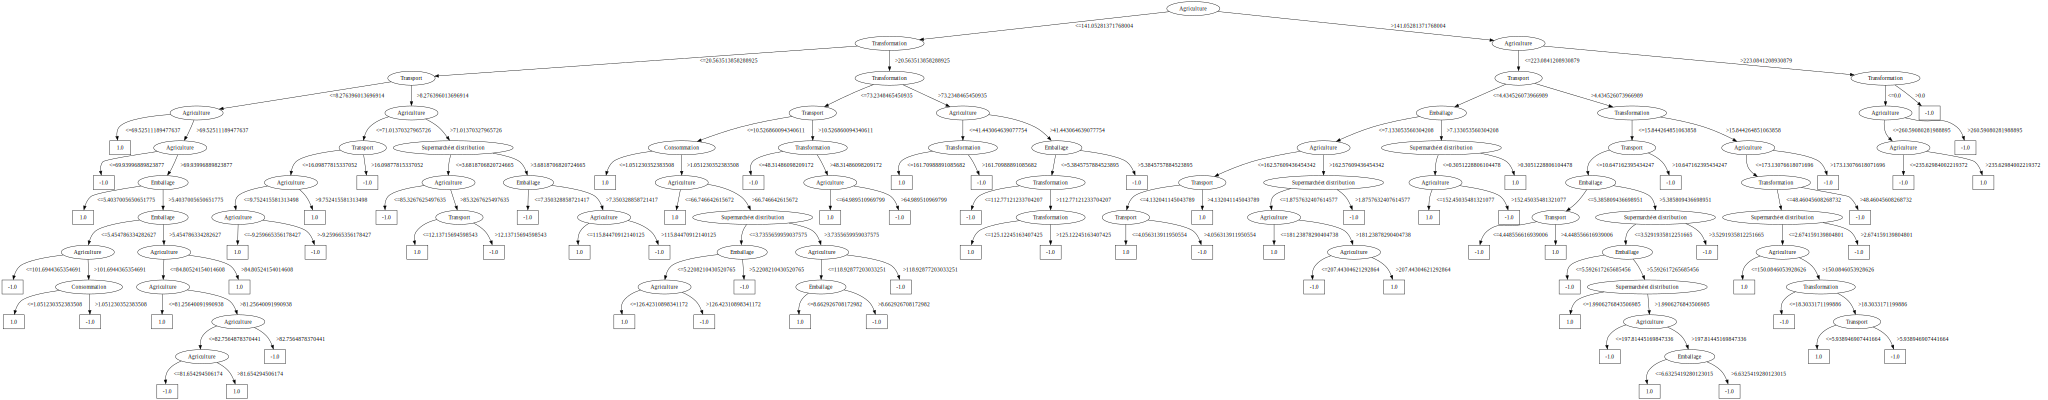

In [23]:
import graphviz as gv

# Initialiation d'un arbre pour le dataset Iris:
arbre_etapes = cl.ClassifierArbreNumerique(len(l_etape), 0.0, l_etape)

# Construction de l'arbre de décision à partir du dataset Iris
arbre_etapes.train(X6D,Y6D)

# Construction de la représentation graphique (affichage)
graphe_arbre_etapes = gv.Digraph(format='png')
arbre_etapes.affiche(graphe_arbre_etapes)

# Affichage du graphe obtenu:
graphe_arbre_etapes

In [86]:
print("Exemple de résultat sur les données numériques: validation croisée avec les arbres de décisions")
# Remarque: j'ai mis des affichage dans la fonction validation croisée afin de montrer
# ce qui se passe:
(res_all, res_moy, res_sd) = ut.validation_croisee(arbre_etapes, (X6D, Y6D), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Exemple de résultat sur les données numériques: validation croisée avec les arbres de décisions
0  :  taille app.=  1591  taille test =  175  Accuracy:  0.9142857142857143
1  :  taille app.=  1589  taille test =  177  Accuracy:  0.9265536723163842
2  :  taille app.=  1589  taille test =  177  Accuracy:  0.864406779661017
3  :  taille app.=  1590  taille test =  176  Accuracy:  0.9602272727272727
4  :  taille app.=  1589  taille test =  177  Accuracy:  0.9830508474576272
5  :  taille app.=  1589  taille test =  177  Accuracy:  0.8983050847457628
6  :  taille app.=  1590  taille test =  176  Accuracy:  0.9715909090909091
7  :  taille app.=  1589  taille test =  177  Accuracy:  0.96045197740113
8  :  taille app.=  1589  taille test =  177  Accuracy:  0.9491525423728814
9  :  taille app.=  1589  taille test =  177  Accuracy:  0.8757062146892656
Perf obtenues :  [0.9142857142857143, 0.9265536723163842, 0.864406779661017, 0.9602272727272727, 0.9830508474576272, 0.8983050847457628, 0.97159090

## 2. Apprentissage non-supervisé

### 2.1 Clustering

[[0, 8, 0.004346481802418299, 2],
 [41, 55, 0.017838350544297596, 3],
 [3, 7, 0.019839404537305504, 2],
 [15, 16, 0.021882754546989625, 2],
 [9, 56, 0.02216763826198104, 4],
 [11, 39, 0.025026097342988208, 2],
 [35, 37, 0.02709183018894113, 2],
 [14, 43, 0.02915746988446982, 2],
 [31, 34, 0.03035181392669928, 2],
 [19, 59, 0.0308073841445652, 5],
 [62, 64, 0.03158664870524992, 7],
 [60, 65, 0.03321024322687382, 9],
 [61, 66, 0.03397147846154386, 11],
 [13, 67, 0.039216779008153055, 12],
 [6, 68, 0.039358166202090816, 13],
 [28, 32, 0.04261903328633217, 2],
 [29, 69, 0.043161451119224314, 14],
 [20, 54, 0.04668085844677642, 2],
 [22, 71, 0.04758366150245131, 15],
 [24, 63, 0.04821710066075575, 3],
 [30, 74, 0.04840559688384319, 4],
 [73, 75, 0.050963520572361545, 19],
 [17, 72, 0.05198445326923549, 3],
 [70, 76, 0.052325895619219735, 21],
 [77, 78, 0.05532574621161332, 24],
 [2, 12, 0.05624816501957922, 2],
 [51, 79, 0.056298495925762, 25],
 [42, 80, 0.058277411907403265, 3],
 [21, 81, 

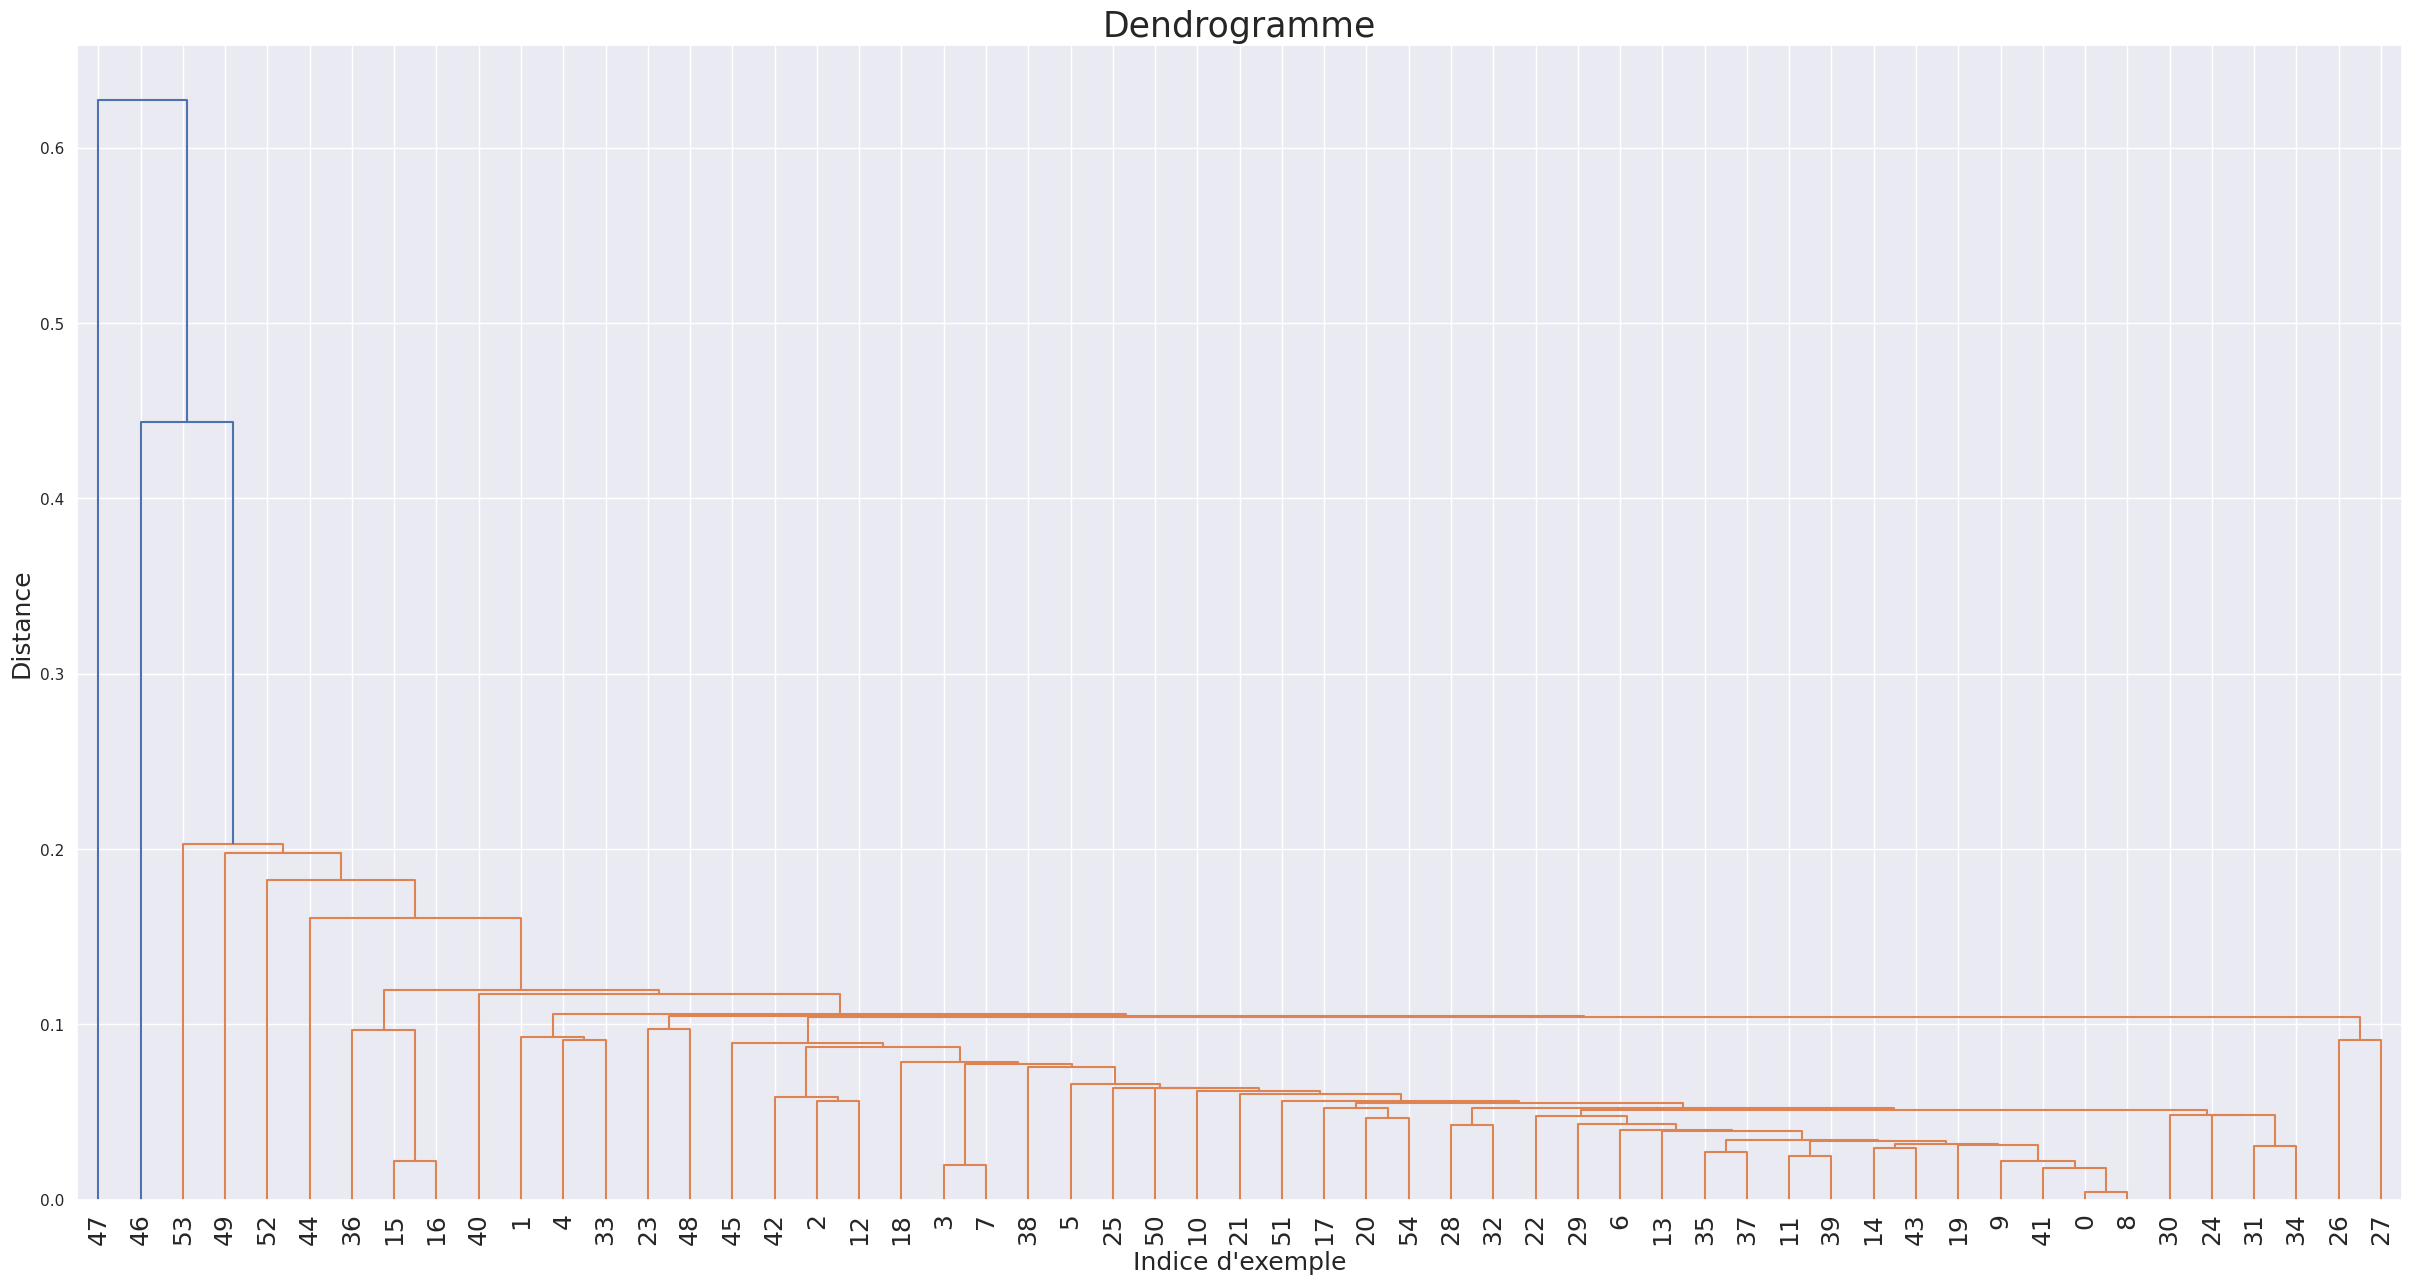

In [24]:
#unique_combinations = data_synthese_norm.drop_duplicates(subset=['Groupe d\'aliment', 'Sous-groupe d\'aliment'])
data_etape_norm2 = data_etape_norm.copy()
#data_synthese_norm.head(10)
#"Groupe d'aliment","Sous-groupe d'aliment",
data_etape_norm2['Groupe d\'aliment'] = data_synthese_dqr["Groupe d'aliment"]
data_etape_norm2['Sous-groupe d\'aliment'] = data_synthese_dqr["Sous-groupe d'aliment"]
unique_combinations = data_etape_norm2.groupby(['Groupe d\'aliment', 'Sous-groupe d\'aliment']).mean().reset_index()

unique_labels = unique_combinations.apply(lambda row: ', '.join(row[:2].astype(str)), axis=1)
unique_combinations
unique_labels

unique_data = unique_combinations.iloc[:,2:]
clust.CHA(unique_data, "simple", False, True)
#clust.CHA(data_etape_norm, "centroid", False, True)

### 2.2 K-means

/Users/zhile/Downloads/projet-2-Charpentier_Zhang/projet/../iads/Clustering.py:74: RuntimeWarning: Mean of empty slice.
  if len(c) != 0:
/Users/zhile/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


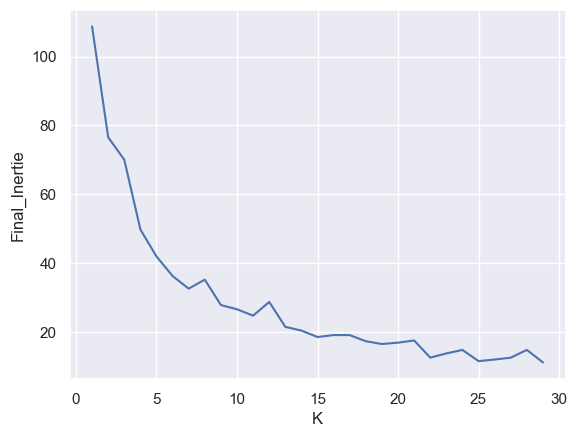

In [129]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée
l_finalInertie = []
l_k = []

for k in range(1,30):
    les_centres, l_affectation,final_inertie = clust.kmoyennes(k, data_etape_norm, 0.05, 100)
    l_finalInertie.append(final_inertie)
    l_k.append(k)
    
ut.plt.plot(l_k, l_finalInertie)
ut.plt.ylabel('Final_Inertie')
ut.plt.xlabel("K")
ut.plt.show()

On prends k = 9

/Users/zhile/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/zhile/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


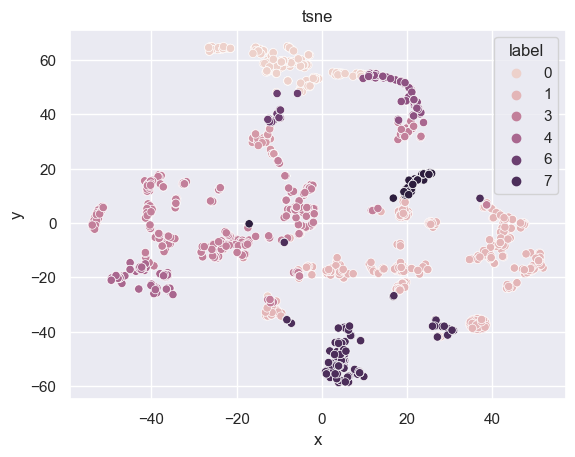

In [96]:
les_centres, l_affectation,final_inertie = clust.kmoyennes(9, data_etape_norm, 0.05, 100)
x_values = [] # X_data
y_values = [] # cluster

for cluster in l_affectation.keys():
    for j in l_affectation[cluster]:
        [selected_rows] = data_etape_norm.iloc[[j]].values.tolist()
        x_values.append(selected_rows)
        y_values.append(cluster)
#print(x_values)
#print(y_values)

sns.set()
"""
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_values)
"""

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_values)
df = pd.DataFrame(x_tsne, columns=['x', 'y'])
df['label'] = y_values
sns.scatterplot(x="x", y="y", hue="label", data=df)
plt.title('tsne')
plt.show()

# Data Ingredients

## Pretraitement des donnees

Nous étudions le écotoxicité pour écosystèmes aquatiques d'eau douce. Sélectionnons les catégories suivantes comme variable caractéristique  :

1.Acidification terrestre et eaux douces
2.Eutrophisation eaux douces
3.Eutrophisation marine 
4.Eutrophisation terrestre
5.Épuisement des ressources eau

In [27]:
l_Xcorr = ['Acidification terrestre et eaux douces','Eutrophisation eaux douces','Eutrophisation marine','Eutrophisation terrestre','Épuisement des ressources eau']
ingredients_nom = (data_ingredients.columns).tolist()
#ingredients_nom.tolist()
l_X = []
for nom in l_Xcorr:
    l_X.append( ingredients_nom[ ingredients_nom.index(nom)+ 4 ] )
print(l_X)

data_ingredients_total = data_ingredients.loc[data_ingredients["Ingredients"] == "Total"]
data_ingredients_5D = data_ingredients_total[l_Xcorr]
data_ingredients_5D2 = data_ingredients_5D.copy(deep=True)
for i in range(5):
    data_ingredients_5D2[ l_Xcorr[i] ] =  data_ingredients_total[ l_X[i] ]
data_ingredients_5D2["Écotoxicité pour écosystèmes aquatiques d'eau douce"]= data_ingredients_total["Épuisement des ressources minéraux"]
data_ingredients_5D = data_ingredients_5D2
data_ingredients_5D = data_ingredients_5D.reset_index(drop=True)
data_ingredients_5D.head(10)

["Écotoxicité pour écosystèmes aquatiques d'eau douce", 'Utilisation du sol', 'Épuisement des ressources eau', 'Épuisement des ressources énergétiques', 'm3 depriv./kg de produit']


,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Épuisement des ressources eau,Écotoxicité pour écosystèmes aquatiques d'eau douce
0,0.01930,0.000312,0.00673,0.0793,0.455,19.9
1,0.00800,0.000179,0.00417,0.0302,3.860,10.1
2,0.06990,0.002820,0.02990,0.1880,9.130,65.1
3,0.02160,0.000273,0.00660,0.0900,1.220,23.6
4,0.01090,0.000286,0.00831,0.0349,18.900,28.2
5,0.01790,0.000486,0.00818,0.0654,7.560,27.8
6,0.03100,0.000458,0.01530,0.1190,20.100,18.5
7,0.01090,0.000315,0.00866,0.0407,2.560,21.1
8,0.00768,0.000176,0.00374,0.0271,2.320,10.5
9,0.04230,0.000788,0.02330,0.1830,4.970,60.1


In [28]:
data_ingredients_5D_norm = clust.normalisation(data_ingredients_5D)
data_ingredients_5D_norm.head(10)

,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Épuisement des ressources eau,Écotoxicité pour écosystèmes aquatiques d'eau douce
0,0.011336,0.035940,0.017719,0.010789,0.194679,0.036908
1,0.004381,0.019514,0.010700,0.003938,0.267465,0.018091
2,0.042478,0.345688,0.081246,0.025955,0.380118,0.123695
3,0.012751,0.031123,0.017363,0.012282,0.211032,0.044012
4,0.006166,0.032729,0.022051,0.004594,0.588964,0.052844
5,0.010474,0.057430,0.021695,0.008850,0.346557,0.052076
6,0.018537,0.053971,0.041216,0.016328,0.614616,0.034220
7,0.006166,0.036310,0.023011,0.005403,0.239676,0.039212
8,0.004184,0.019143,0.009521,0.003506,0.234546,0.018859
9,0.025492,0.094728,0.063150,0.025257,0.291193,0.114094


In [29]:
X5D = np.array(data_ingredients_5D_norm[l_Xcorr], dtype=float)
Y5D = np.array(data_ingredients_5D_norm["Écotoxicité pour écosystèmes aquatiques d'eau douce"], dtype=float)
data_ingredients5D_norm = data_ingredients_5D_norm.copy(deep=True)
#print(data_ingredients_5D_norm["Écotoxicité pour écosystèmes aquatiques d'eau douce"].describe())
"""
count    6856.000000
mean        0.025803
std         0.052915
min         0.000000
25%         0.003073
50%         0.006402
75%         0.024937
max         1.000000

"""
#On prends seuile est 0.0035
data_ingredients5D_norm.loc[data_ingredients_5D_norm["Écotoxicité pour écosystèmes aquatiques d'eau douce"]<= 0.006, "Écotoxicité pour écosystèmes aquatiques d'eau douce"] = 1
data_ingredients5D_norm.loc[data_ingredients_5D_norm["Écotoxicité pour écosystèmes aquatiques d'eau douce"] > 0.006, "Écotoxicité pour écosystèmes aquatiques d'eau douce"] = -1
Y5D = np.array(data_ingredients5D_norm["Écotoxicité pour écosystèmes aquatiques d'eau douce"], dtype=float)
dim_5 = X5D.shape[1]
data_ingredients5D_norm.head(10)

,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Épuisement des ressources eau,Écotoxicité pour écosystèmes aquatiques d'eau douce
0,0.011336,0.035940,0.017719,0.010789,0.194679,-1.0
1,0.004381,0.019514,0.010700,0.003938,0.267465,-1.0
2,0.042478,0.345688,0.081246,0.025955,0.380118,-1.0
3,0.012751,0.031123,0.017363,0.012282,0.211032,-1.0
4,0.006166,0.032729,0.022051,0.004594,0.588964,-1.0
5,0.010474,0.057430,0.021695,0.008850,0.346557,-1.0
6,0.018537,0.053971,0.041216,0.016328,0.614616,-1.0
7,0.006166,0.036310,0.023011,0.005403,0.239676,-1.0
8,0.004184,0.019143,0.009521,0.003506,0.234546,-1.0
9,0.025492,0.094728,0.063150,0.025257,0.291193,-1.0


## 1. Apprentissage Supervise

### 1.1 KNN

k=1	acc=0.9339622641509434	time=0.6488585472106934	ratio:1.4393927122727304
k=2	acc=0.9150943396226415	time=0.6410014629364014	ratio:1.4276010158083445
k=3	acc=0.9150943396226415	time=0.6497094631195068	ratio:1.4084670018948455
k=4	acc=0.8867924528301887	time=0.6343715190887451	ratio:1.3979071035598167
k=5	acc=0.9811320754716981	time=0.6232287883758545	ratio:1.5742727129607508
k=6	acc=0.9622641509433962	time=0.6263933181762695	ratio:1.536197981397706
k=7	acc=0.9622641509433962	time=0.7275431156158447	ratio:1.3226214780808787
k=8	acc=0.9622641509433962	time=0.7044217586517334	ratio:1.3660341111341796
k=9	acc=0.9764150943396226	time=0.6407170295715332	ratio:1.5239412240885508
k=10	acc=0.9622641509433962	time=0.6251344680786133	ratio:1.53929146460436
k=11	acc=0.9858490566037735	time=0.637688159942627	ratio:1.5459735941976258
k=12	acc=0.9716981132075472	time=0.6337816715240479	ratio:1.5331748405896866
k=13	acc=0.9764150943396226	time=0.6302101612091064	ratio:1.5493483831906096
k=14	acc=0.9

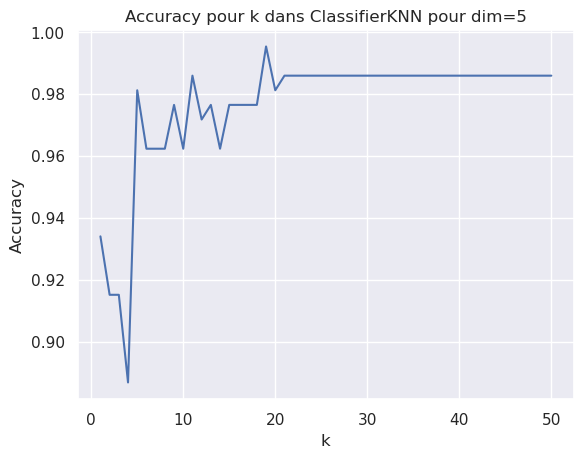

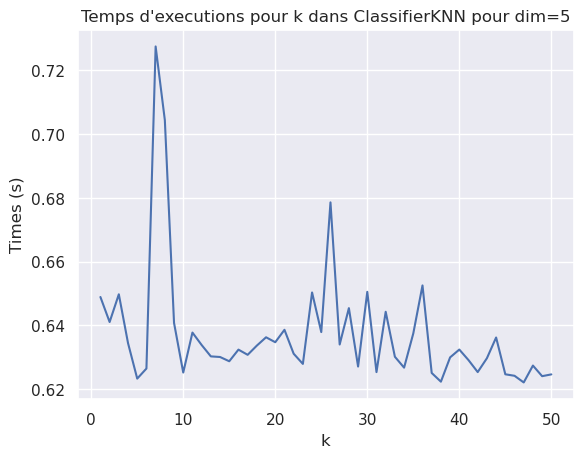

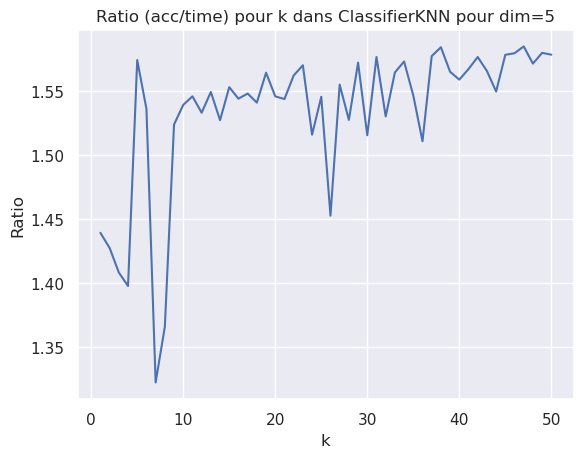

meilleur k: 19, acc: 0.9952830188679245, t_exec: 0.63620924949646


In [30]:
np.random.seed(42)
import time
# on stocke les accuracies dans une liste :
accuracies_knn_5d = []
times_knn_5d = []
ratios_knn_5d = []

# seuil max des valeurs de k à regarder:
increment = 1
seuil_k = 51

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,increment)]

c = cl.ClassifierKNN(dim_5, 1)

Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X5D, Y5D, 5, 0)

#print(Xtest,Ytest)
c.train(Xapp, Yapp)

for k in valeurs_k:
    c.k = k
    tic = time.time()
    acc = c.accuracy(Xtest, Ytest)
    toc = time.time()
    chrono = toc - tic
    
    accuracies_knn_5d.append(acc)
    times_knn_5d.append(chrono)
    ratios_knn_5d.append(acc/chrono)
    print(f"k={k}\tacc={acc}\ttime={chrono}\tratio:{acc/chrono}")

# plots des accuracies
ut.plot2D(valeurs_k, accuracies_knn_5d, "k", 'Accuracy', "Accuracy pour k dans ClassifierKNN pour dim=5")
#plt.savefig("knn_ingredients.pdf", transparent=True, format="pdf")
ut.plot2D(valeurs_k, times_knn_5d, "k", 'Times (s)', "Temps d'executions pour k dans ClassifierKNN pour dim=5")
ut.plot2D(valeurs_k, ratios_knn_5d, "k", "Ratio", "Ratio (acc/time) pour k dans ClassifierKNN pour dim=5")

#trouver meilleur k
best_acc_5d = max(accuracies_knn_5d)
best_k_5d = valeurs_k[accuracies_knn_5d.index(best_acc_5d)]
best_time_5d = times_knn_5d[accuracies_knn_5d.index(best_acc_5d)]
print(f"meilleur k: {best_k_5d}, acc: {best_acc_5d}, t_exec: {best_time_5d}")

Accuracy moyenne: 0.9896843590195733
Ecart type: 0.014152193072560394
Temps de validation: 3.6116082668304443


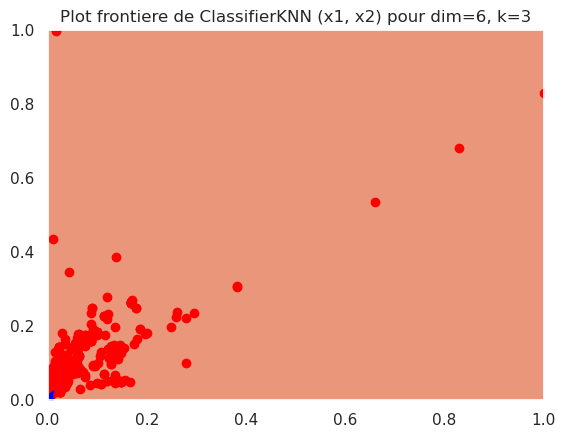

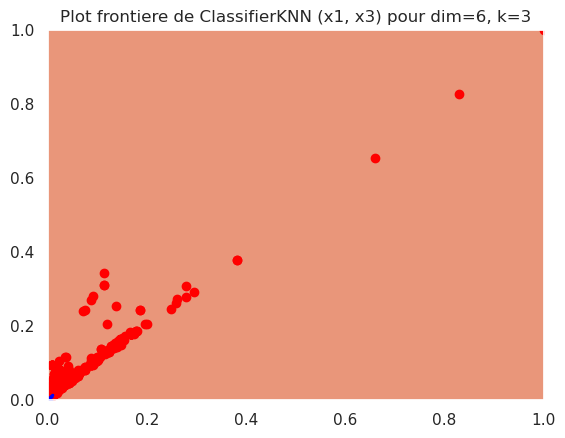

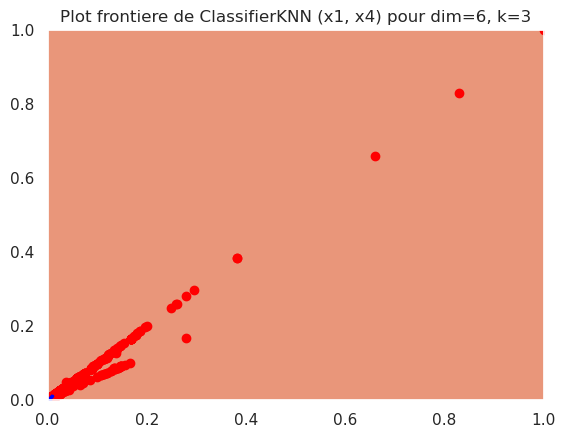

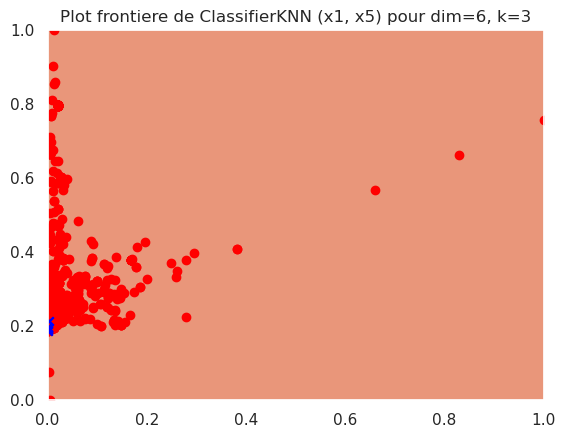

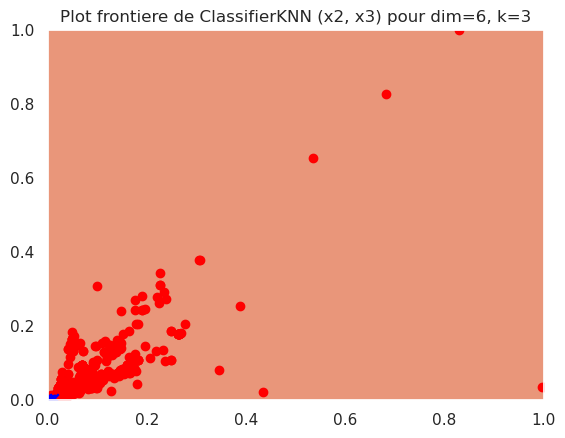

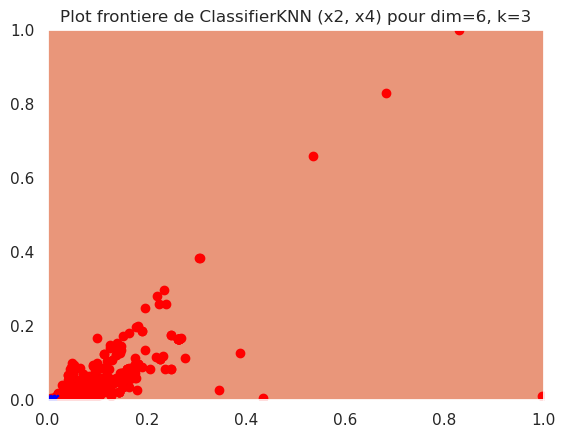

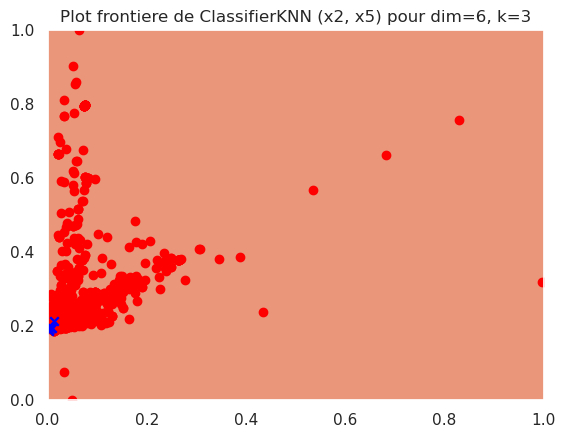

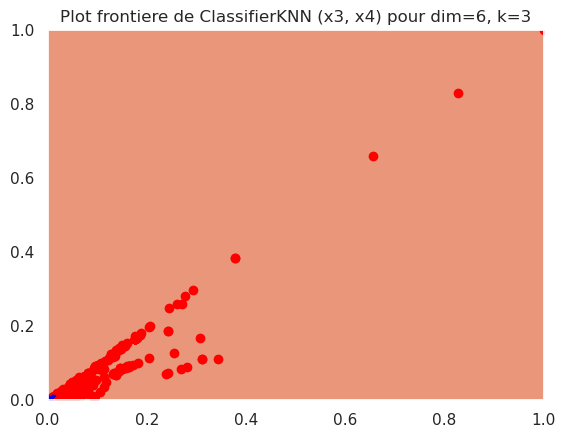

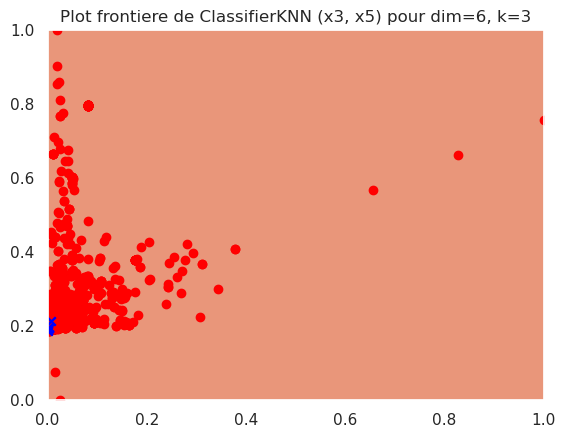

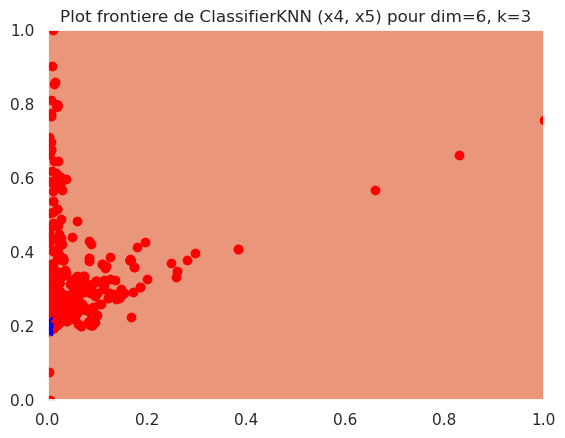

In [31]:
# init classifierKNN avec k optimal
classifierKNN = cl.ClassifierKNN(dim_5, best_k_5d)
acc_knn_5d = []
nb_iter = 10
temps_knn_validation_5d = 0

# realiser test de validation croisee en 10
for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X5D, Y5D, nb_iter, i)
    
    tic = time.time()
    classifierKNN.train(data_train, label_train)
    acc_knn_5d.append(classifierKNN.accuracy(data_test, label_test))
    toc = time.time()
    
    temps_knn_validation_5d += toc - tic

# analyser statistiques sur l'entrainement
(acc_knn_mean_5d,acc_knn_ecartType_5d) = ut.analyse_perfs(acc_knn_5d)
print(f"Accuracy moyenne: {acc_knn_mean_5d}")
print(f"Ecart type: {acc_knn_ecartType_5d}")
print(f"Temps de validation: {temps_knn_validation_5d}")

X5D_t = np.transpose(X5D)

# afficher les 10 combinaisons possibles de variables de x
for i in range(0, 5):
    for j in range(i+1, 5):
        #print(f"Plot x{i+1}, x{j+1}")
        #ut.plt.legend([f"x{i+1}", f"x{j+1}"])
        ut.plot_frontiere_ND(X5D, Y5D, classifierKNN, 5, i, j, 30)
        ut.plt.title(f"Plot frontiere de ClassifierKNN (x{i+1}, x{j+1}) pour dim=6, k={3}")
        ut.plot2DSet(np.transpose(ut.zip_x(X5D_t, i, j)), Y5D)
        ut.plt.show()

### 1.2 Perceptron

best poids_0: False
best learning rate :  0.0001
best accuracy :  0.9813084112149533
Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire : 2.5722696781158447


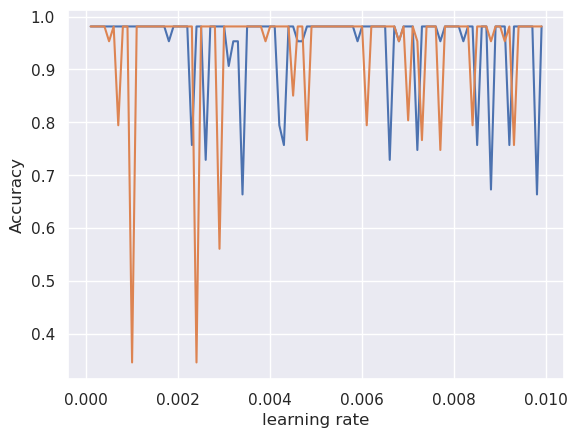

In [32]:
np.random.seed(42)
# on stocke les accuracies dans les listes :
acc_F_5d = []
acc_T_5d = []

# Trouver best Initialisation aléatoire et Learning rate
learning_rate = [eps*0.0001 for eps in range(1, 100, 1)]
nb_iter = 10

data_train, label_train, data_test, label_test = ut.crossval_strat(X5D, Y5D, nb_iter,1)

tic = time.time()

# Trouver best Initialisation aléatoire et Learning rate
for i in learning_rate:
    #Init True
    perceptron1 = cl.ClassifierPerceptron(dim_5, i, True)
    perceptron1.train(data_train, label_train)
    acc_T_5d.append(perceptron1.accuracy(data_test, label_test))
    #Init False
    perceptron2 = cl.ClassifierPerceptron(dim_5, i, False)
    perceptron2.train(data_train, label_train)
    acc_F_5d.append(perceptron2.accuracy(data_test, label_test))

# Trouver best accuracy 
best_percep_acc_T_5d = max(acc_T_5d)
best_percep_acc_F_5d = max(acc_F_5d)
best_percep_learning_rate_5d = 0
best_percep_poids_0_5d = True

# Comparer 
if best_percep_acc_T_5d > best_percep_acc_F_5d:
    best_percep_poids_0_5d = True
    index = acc_T_5d.index(best_percep_acc_T_5d)
    best_percep_learning_rate_5d = learning_rate[index]
    print("best poids_0: True")
    print("best learning rate : ", best_percep_learning_rate_5d)
    print("best accuracy : ", best_percep_acc_T_5d)
else:
    best_percep_poids_0_5d = False
    index = acc_F_5d.index(best_percep_acc_F_5d)
    best_percep_learning_rate_5d = learning_rate[index]
    print("best poids_0: False")
    print("best learning rate : ", best_percep_learning_rate_5d)
    print("best accuracy : ", best_percep_acc_F_5d)
toc = time.time()
# Le temps pour trouver best learning rate et Init
times_percept_5d = toc - tic

print("Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire :" , times_percept_5d)
ut.plt.plot(learning_rate, acc_T_5d)
ut.plt.plot(learning_rate, acc_F_5d)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
#plt.savefig("perceptron_ingredients.pdf", transparent=True, format="pdf")
ut.plt.show()

Accuracy moyenne: 0.9849760267358576
Ecart type: 0.006162172529345812
time_percep_validation croisée en 10 : 0.03808140754699707


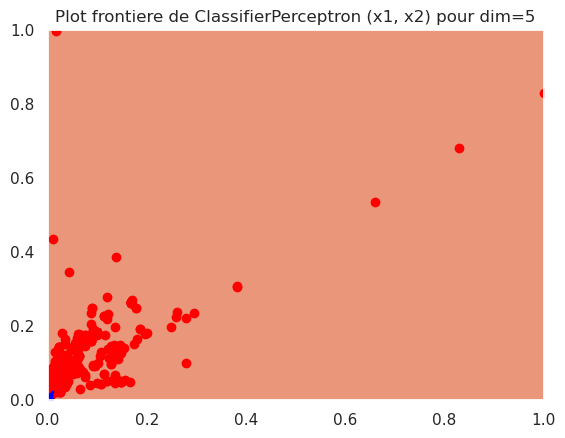

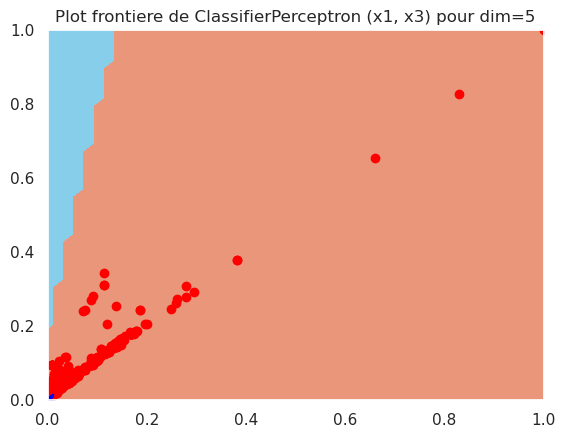

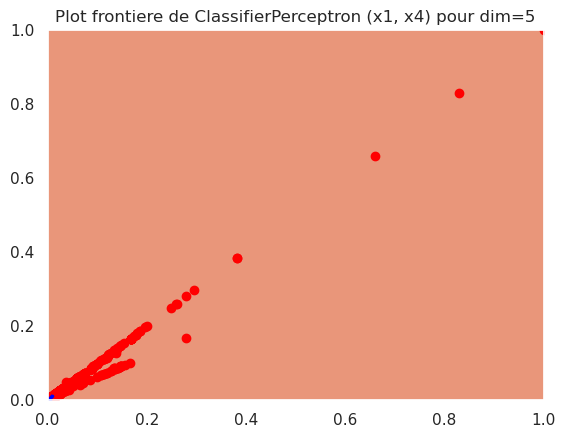

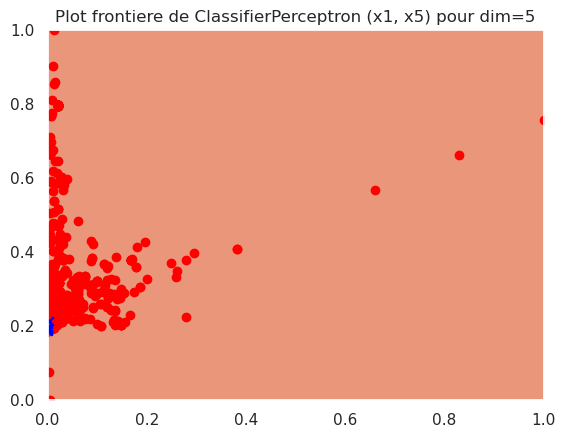

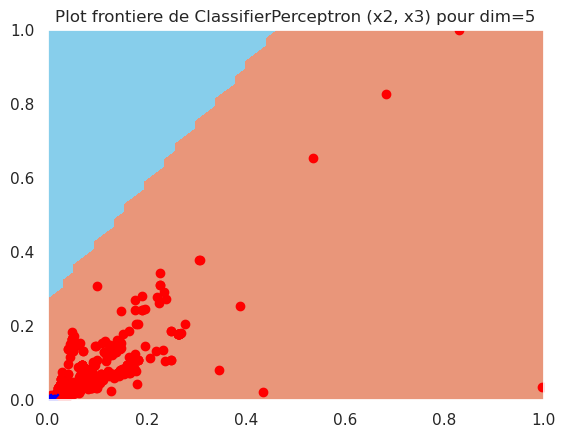

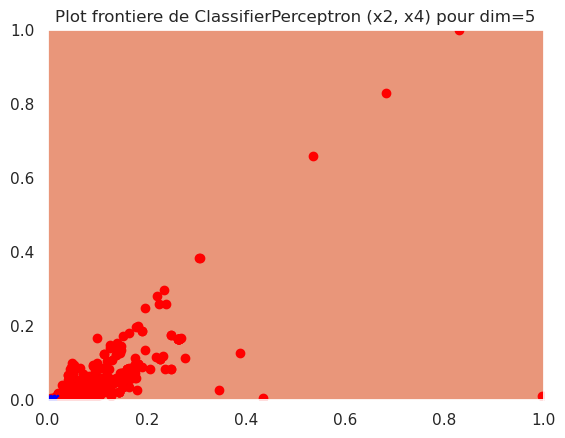

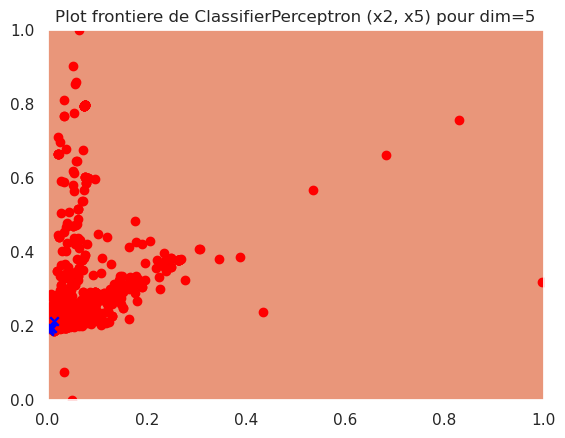

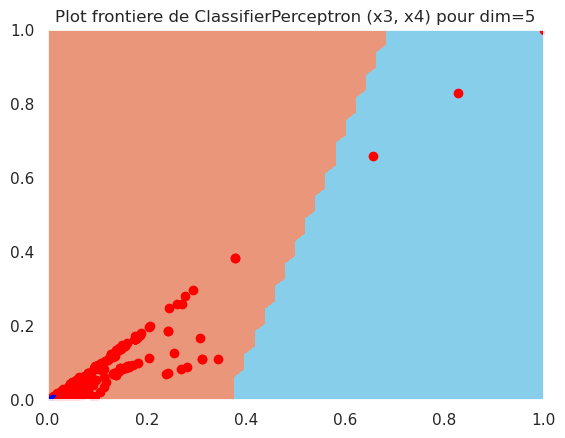

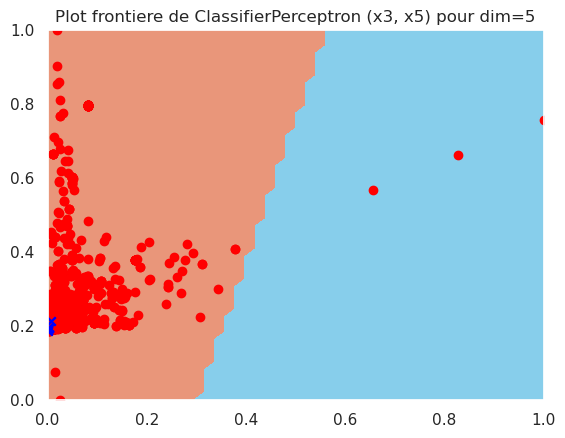

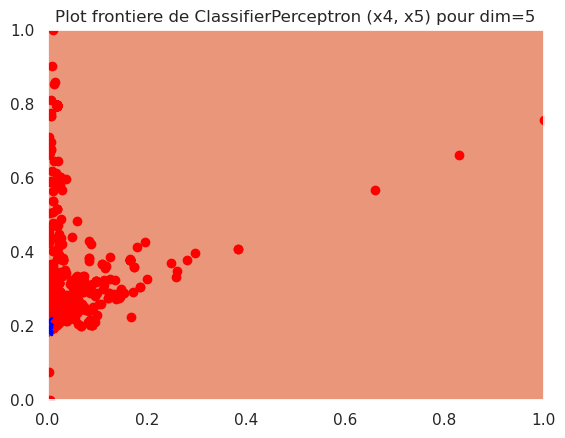

In [33]:
np.random.seed(42)
acc_percep_5d = []
perceptron1 = cl.ClassifierPerceptron(dim_5, best_percep_learning_rate_5d, best_percep_poids_0_5d)

time_percep_validation_5d = 0

#réaliser une validation croisée en 10 
for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X5D,Y5D,nb_iter, i)
    
    tic = time.time()
    perceptron1.train(data_train, label_train)
    acc_percep_5d.append(perceptron1.accuracy(data_test,label_test))
    toc = time.time()
    time_percep_validation_5d += toc-tic

#print(acc_percep_5d)
(acc_percep_mean_5d,acc_percep_ecartType_5d) = ut.analyse_perfs(acc_percep_5d)
print(f"Accuracy moyenne: {acc_percep_mean_5d}")
print(f"Ecart type: {acc_percep_ecartType_5d}")
print(f"time_percep_validation croisée en 10 : {time_percep_validation_5d}")

X5D_t = np.transpose(X5D)
# afficher resultats frontiere
for i in range(0, 5):
    for j in range(i+1, 5):
        #print(f"Plot x{i+1}, x{j+1}")
        ut.plot_frontiere_ND(X5D, Y5D, perceptron1, 5, i, j, 50)
        ut.plt.title(f"Plot frontiere de ClassifierPerceptron (x{i+1}, x{j+1}) pour dim=5")
        ut.plot2DSet(np.transpose(ut.zip_x(X5D_t, i, j)), Y5D)
        ut.plt.show()

### 1.3 Perceptron Biais

In [36]:
import time
np.random.seed(42)
acc_biais_F_5d = []
acc_biais_T_5d = []
learning_rate = [eps*0.001 for eps in range(1,100,1)]

nb_iter = 10

data_train, label_train, data_test, label_test = ut.crossval_strat(X5D, Y5D, nb_iter,1)
tic = time.time()

# parcourir Initialisation aléatoire et Learning rate
for i in learning_rate:
    #print(i)
    perceptron1 = cl.ClassifierPerceptronBiais(dim_5, i, True)
    perceptron1.train(data_train, label_train)
    #print("1",perceptron1.accuracy(data_test, label_test))
    acc_biais_T_5d.append(perceptron1.accuracy(data_test, label_test))
    
    perceptron2 = cl.ClassifierPerceptronBiais(dim_5, i, False)
    perceptron2.train(data_train, label_train)
    #print("2",perceptron2.accuracy(data_test, label_test))
    acc_biais_F_5d.append(perceptron2.accuracy(data_test, label_test))

# determiner meilleur resultats
best_biais_acc_T_5d = max(acc_biais_T_5d)
best_biais_acc_F_5d = max(acc_biais_F_5d)

best_biais_poids_0_5d = best_biais_acc_T_5d > best_biais_acc_F_5d

best_biais_index_5d = acc_biais_T_5d.index(best_biais_acc_T_5d) if best_biais_poids_0_5d else acc_biais_F_5d.index(best_biais_acc_F_5d)
best_biais_learning_rate_5d = learning_rate[best_biais_index_5d]
best_biais_acc_5d = best_biais_acc_T_5d if best_biais_poids_0_5d else best_biais_acc_F_5d

# les afficher
print(f"best poids_0: {best_biais_poids_0_5d}")
print(f"best learning rate : {best_biais_learning_rate_5d}")
print(f"best accuracy : {best_biais_acc_5d}")
    
toc = time.time()
time_percepBiais_5d = toc - tic

ut.plt.plot(learning_rate, acc_biais_T_5d)
ut.plt.plot(learning_rate, acc_biais_F_5d)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
#plt.savefig("perceptron_biais_ingredients.pdf", transparent=True, format="pdf")
ut.plt.show()

KeyboardInterrupt: 

In [ ]:
print("Exemple de résultat: validation croisée avec un perceptron biais")

classif_perceptrion = cl.ClassifierPerceptronBiais(dim_5,best_biais_learning_rate_5d,best_biais_poids_0_5d)

(res_all, res_moy, res_sd) = ut.validation_croisee(classif_perceptrion, (X5D, Y5D), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

### 1.4 Arbre

In [26]:
data_ingredients_num = data_ingredients5D_norm.copy(deep = True)
for i in range(5):
    resultat, liste_vals = cl.discretise(X5D,Y5D,i)
    print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )
    #print(data_synthese_dqr_sansNom['enviroment_Total'].iloc[i])
    data_ingredients_num.loc[data_ingredients5D_norm[l_Xcorr[i]]<= resultat[0], l_Xcorr[i]] = 0
    data_ingredients_num.loc[data_ingredients5D_norm[l_Xcorr[i]]> resultat[0], l_Xcorr[i]] = 1


X5D2 = np.array(data_ingredients_num[l_Xcorr], dtype=float) # conversion de type pour une meilleure compatibilité
print(X5D2.shape)
print(Y5D.shape)
data_ingredients_num.head(10)

Seuil de coupure trouvé: 0.002 et son entropie: 0.04193
Seuil de coupure trouvé: 0.012 et son entropie: 0.04374
Seuil de coupure trouvé: 0.003 et son entropie: 0.04828
Seuil de coupure trouvé: 0.002 et son entropie: 0.03166
Seuil de coupure trouvé: 0.196 et son entropie: 0.06570
(1063, 5)
(1063,)


,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Épuisement des ressources eau,Écotoxicité pour écosystèmes aquatiques d'eau douce
0,1.0,1.0,1.0,1.0,0.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,-1.0
2,1.0,1.0,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0,1.0,-1.0
4,1.0,1.0,1.0,1.0,1.0,-1.0
5,1.0,1.0,1.0,1.0,1.0,-1.0
6,1.0,1.0,1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,-1.0
8,1.0,1.0,1.0,1.0,1.0,-1.0
9,1.0,1.0,1.0,1.0,1.0,-1.0


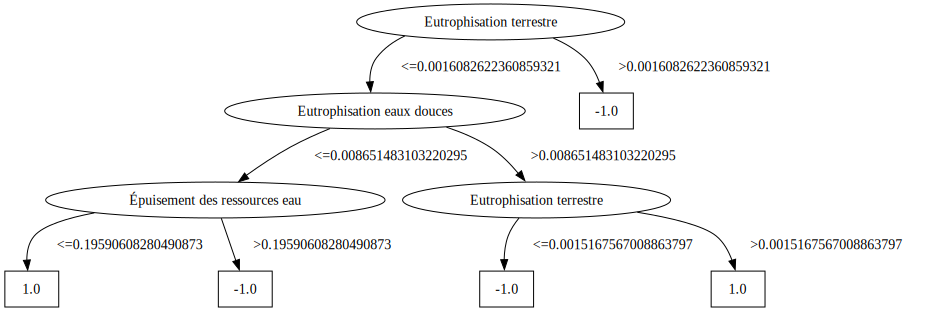

In [31]:
# Initialiation d'un arbre pour le dataset Iris:
arbre_ingredients = cl.ClassifierArbreNumerique(len(l_Xcorr), 0.0, l_Xcorr)

# Construction de l'arbre de décision à partir du dataset Iris
arbre_ingredients.train(X5D,Y5D)

# Construction de la représentation graphique (affichage)
graphe_arbre_ingredients = gv.Digraph(format='pdf')
arbre_ingredients.affiche(graphe_arbre_ingredients)

# Affichage du graphe obtenu:
graphe_arbre_ingredients

In [30]:
print("Exemple de résultat sur les données numériques: validation croisée avec les arbres de décisions")
# ce qui se passe:
(res_all, res_moy, res_sd) = ut.validation_croisee(arbre_ingredients, (X5D, Y5D), 10)

print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Exemple de résultat sur les données numériques: validation croisée avec les arbres de décisions
0  :  taille app.=  958  taille test =  105  Accuracy:  0.9904761904761905
1  :  taille app.=  956  taille test =  107  Accuracy:  0.8317757009345794
2  :  taille app.=  957  taille test =  106  Accuracy:  1.0
3  :  taille app.=  956  taille test =  107  Accuracy:  1.0
4  :  taille app.=  957  taille test =  106  Accuracy:  0.9811320754716981
5  :  taille app.=  957  taille test =  106  Accuracy:  1.0
6  :  taille app.=  957  taille test =  106  Accuracy:  1.0
7  :  taille app.=  956  taille test =  107  Accuracy:  1.0
8  :  taille app.=  957  taille test =  106  Accuracy:  1.0
9  :  taille app.=  956  taille test =  107  Accuracy:  1.0
Perf obtenues :  [0.9904761904761905, 0.8317757009345794, 1.0, 1.0, 0.9811320754716981, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy moyenne:  0.9803383966882467 	écart type:  0.049880186318834174


## 2. Apprentissage non-supervise

### 2.1 Clustering

[[10, 11, 0.002080537640585505, 2],
 [8, 18, 0.020281296315068555, 3],
 [9, 12, 0.02208239176729614, 2],
 [1, 19, 0.02638230519015014, 4],
 [13, 16, 0.033667050241727114, 2],
 [0, 20, 0.04339951397919289, 3],
 [17, 22, 0.04812760482468628, 3],
 [6, 21, 0.04971239704801644, 5],
 [3, 23, 0.07358764744784389, 4],
 [2, 4, 0.09713481054351844, 2],
 [25, 26, 0.10261243209464391, 9],
 [7, 15, 0.11449558135563097, 2],
 [24, 27, 0.13630327847592438, 5],
 [5, 28, 0.16606586314281901, 10],
 [30, 31, 0.21256769759458768, 15],
 [14, 32, 0.27966986166778207, 16],
 [29, 33, 0.5106666484374938, 18]]

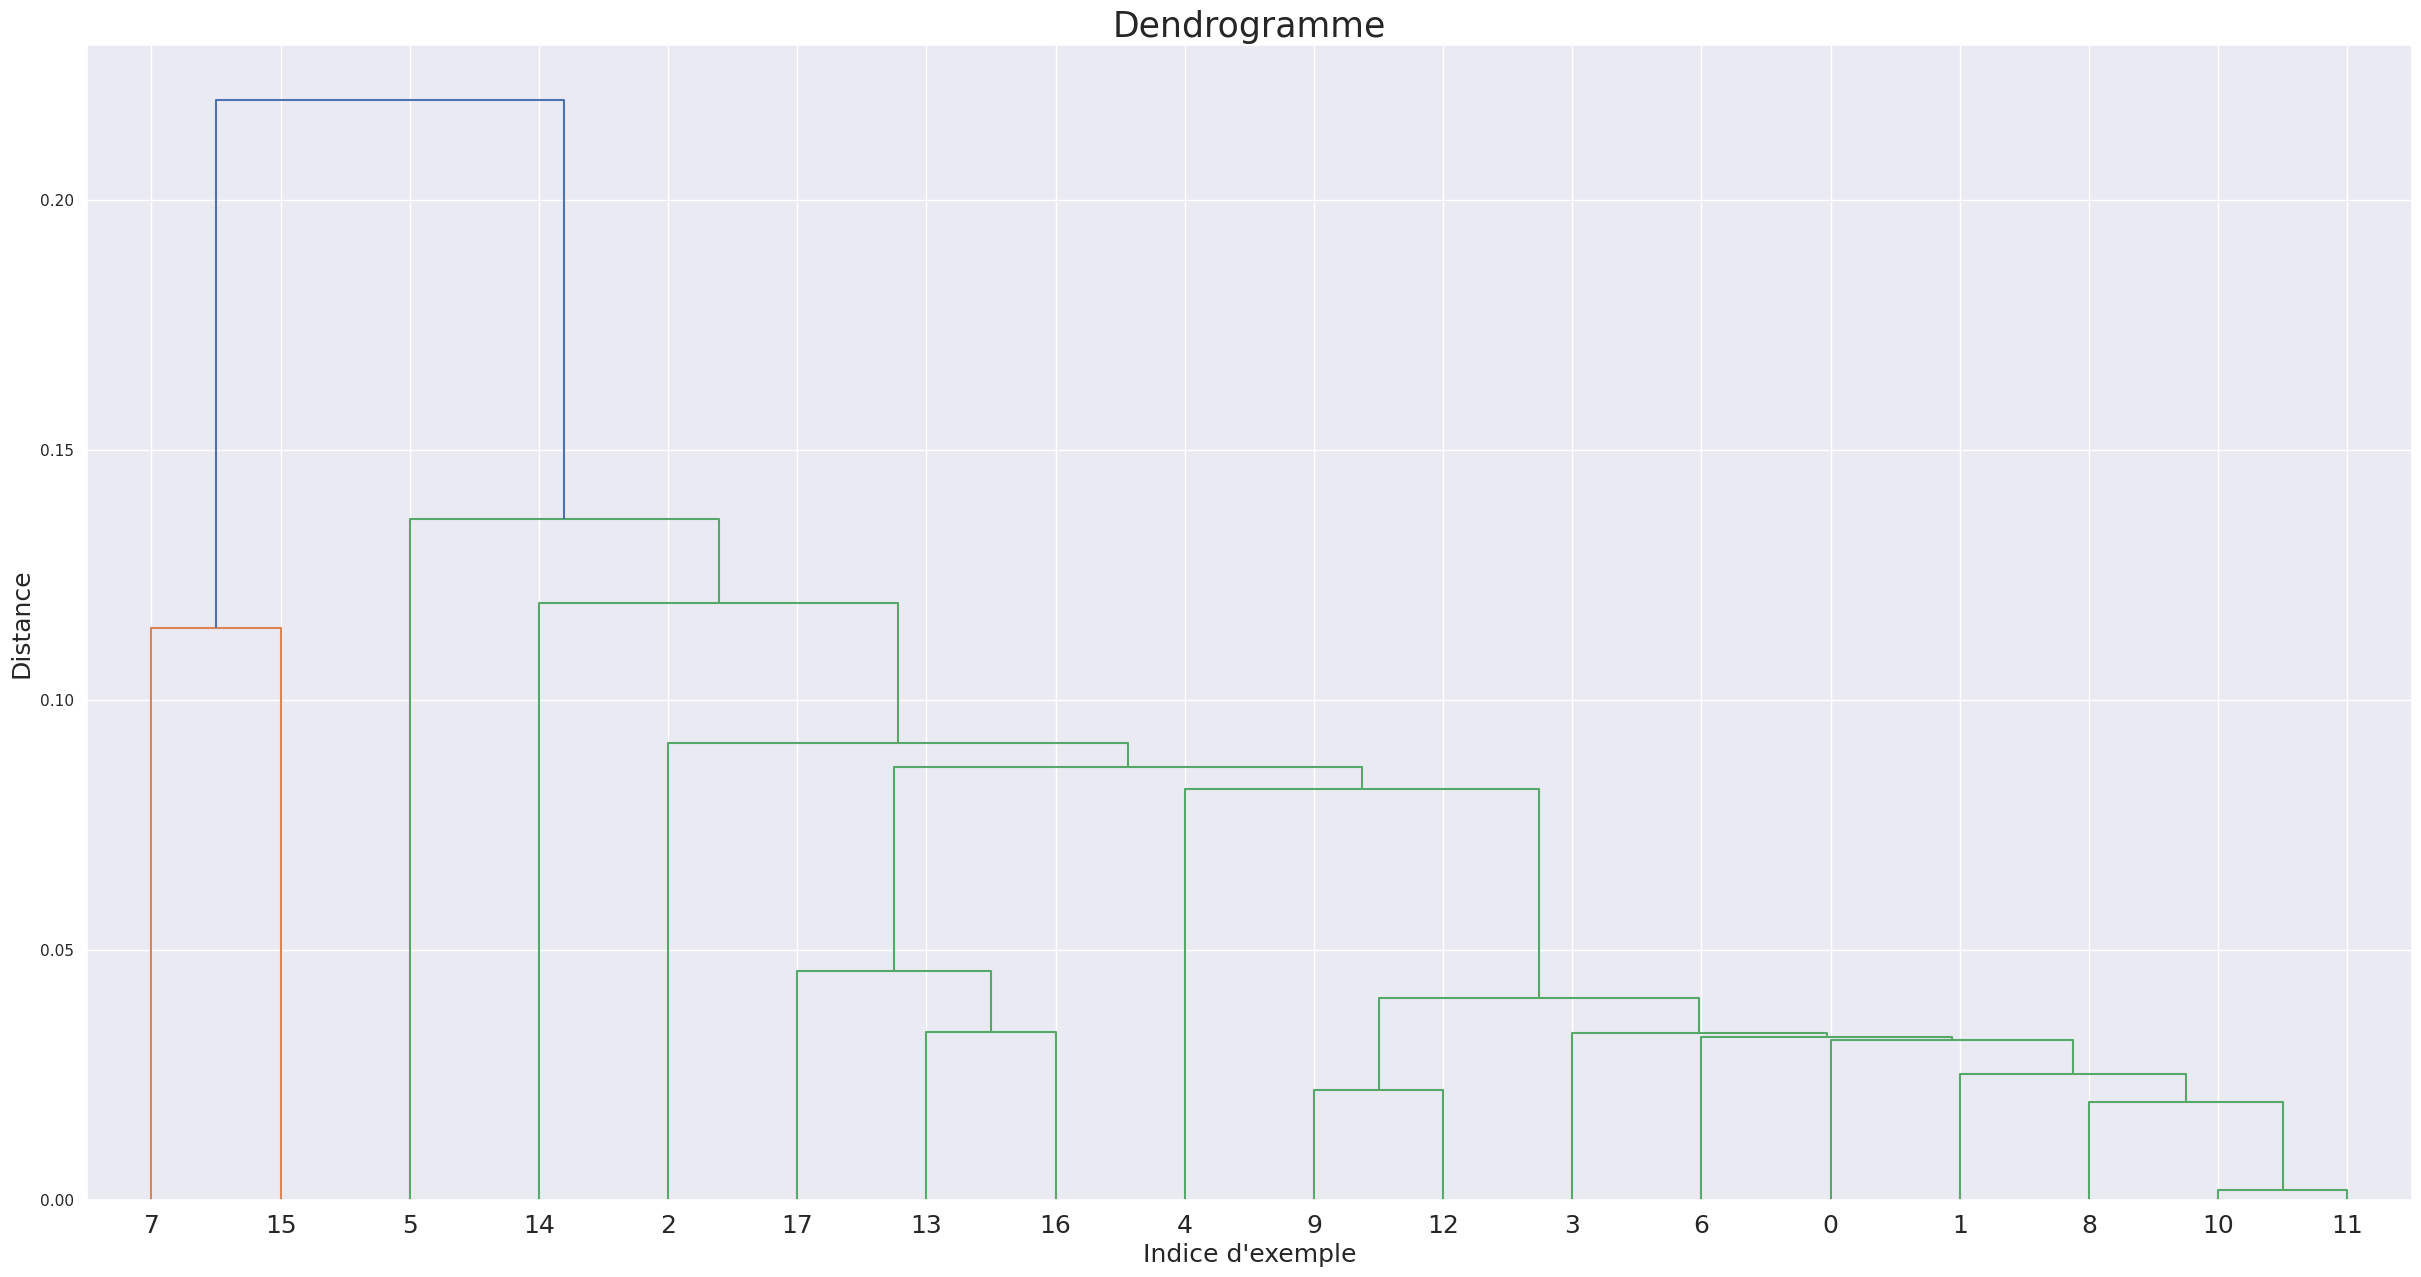

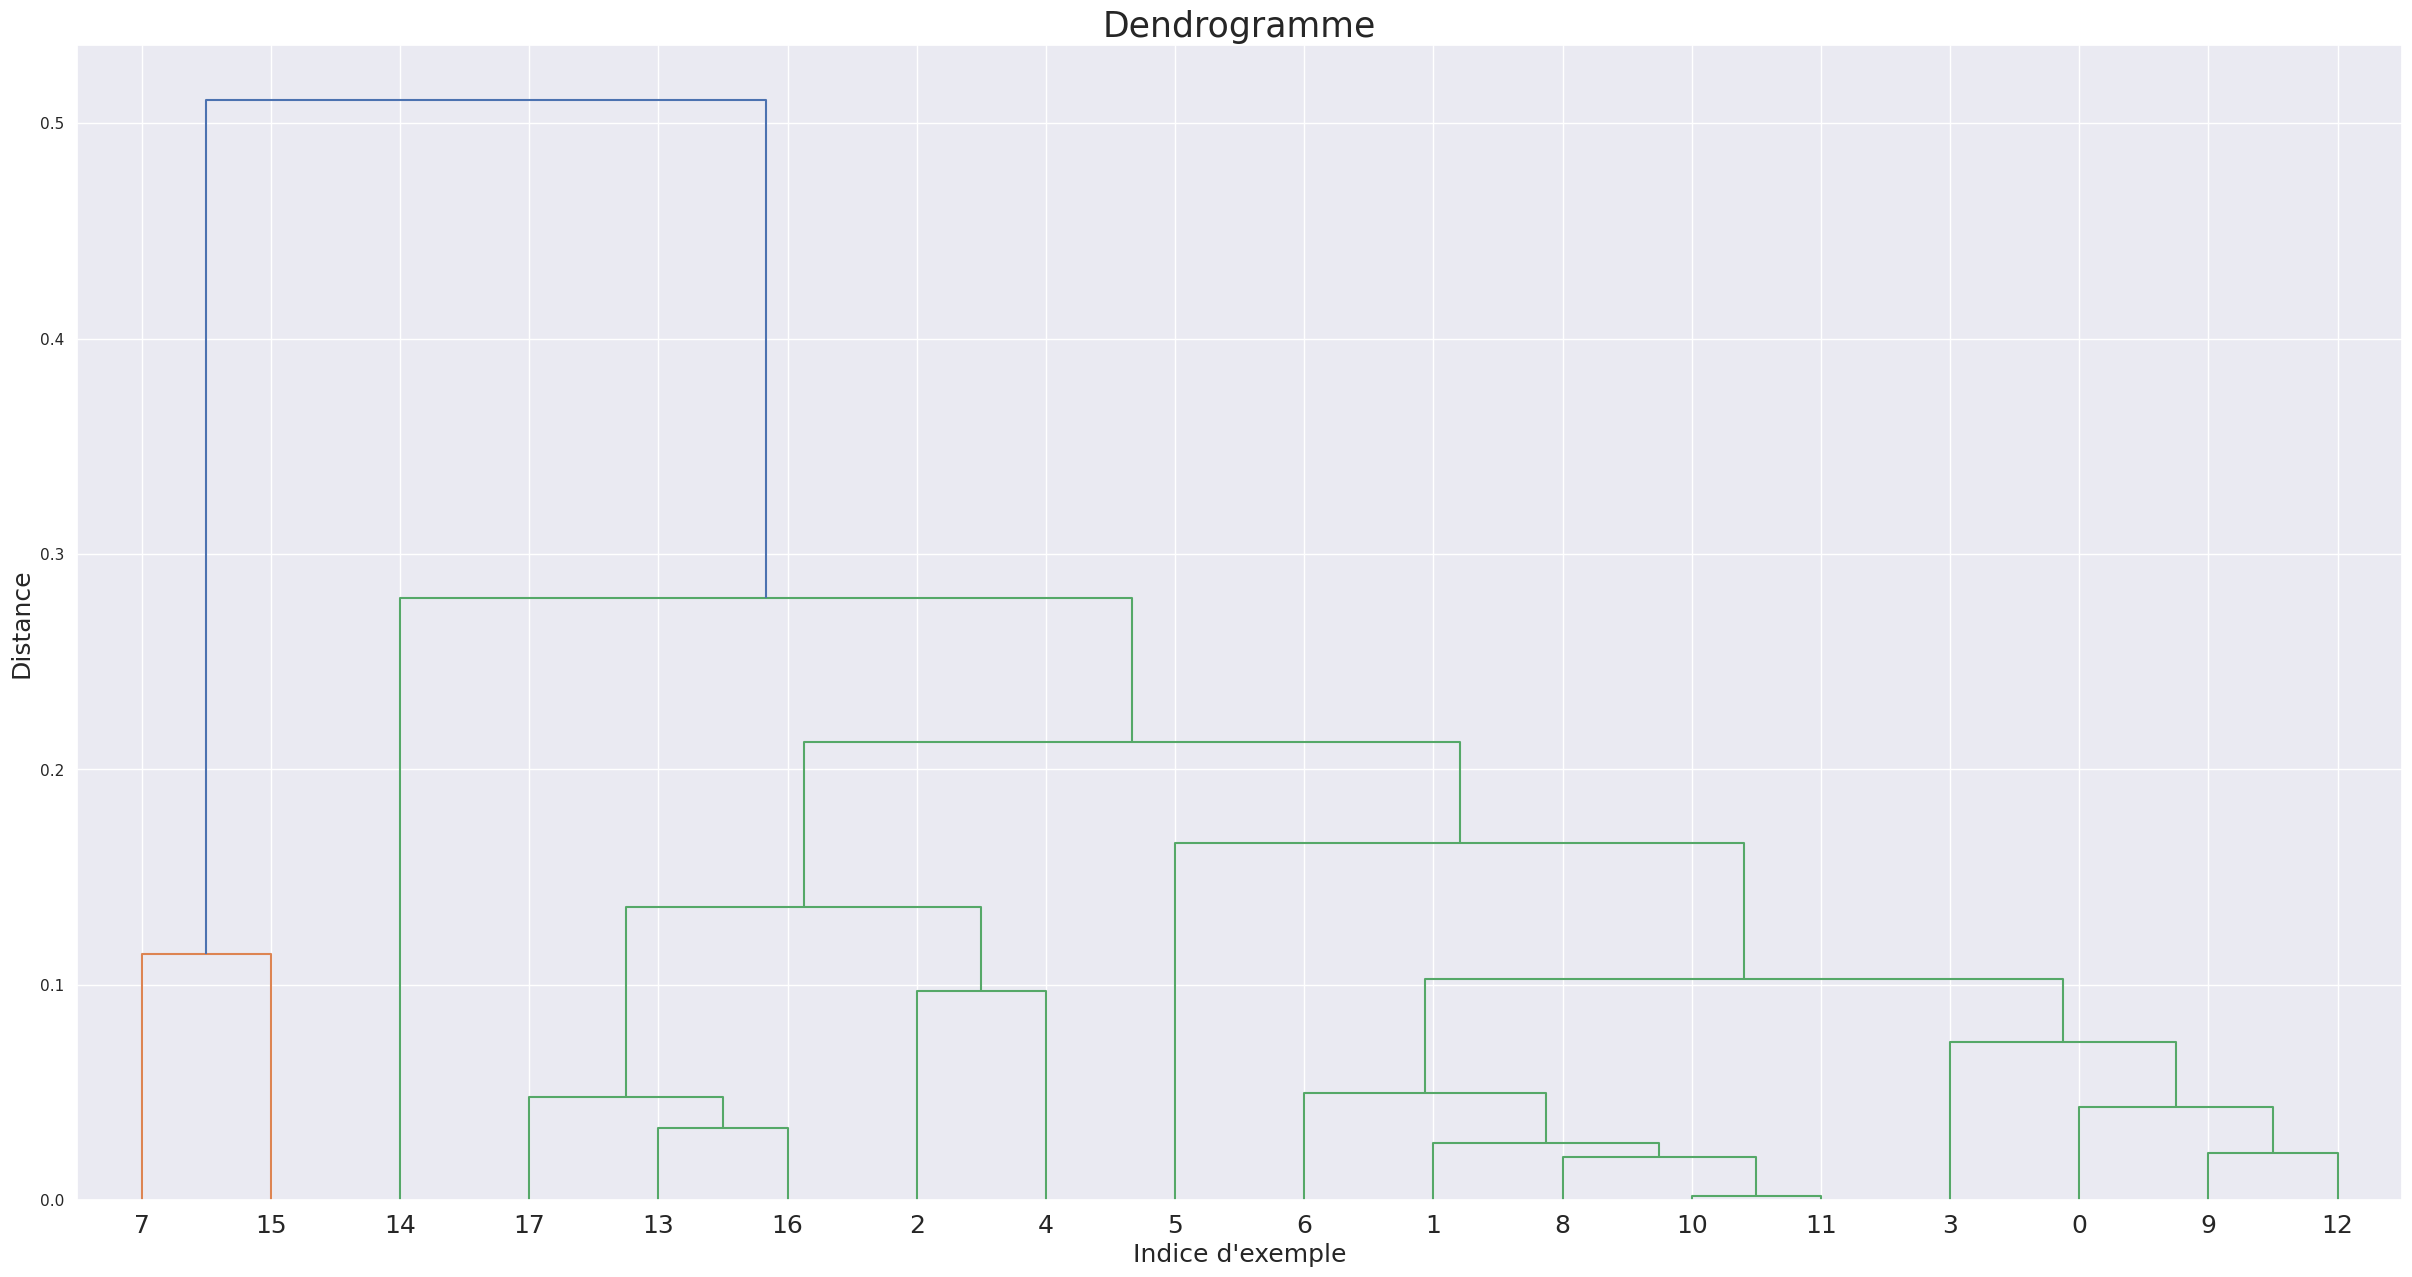

In [37]:
#unique_combinations = data_synthese_norm.drop_duplicates(subset=['Groupe d\'aliment', 'Sous-groupe d\'aliment'])
data_ingredients5D_norm2 = data_ingredients5D_norm.copy()
#data_synthese_norm.head(10)
#"Groupe d'aliment","Sous-groupe d'aliment",
data_ingredients5D_norm2['Groupe d\'aliment'] = data_ingredients_total["Groupe d'aliment"]
data_ingredients5D_norm2['Sous-groupe d\'aliment'] = data_ingredients_total["Sous-groupe d'aliment"]
unique_combinations = data_ingredients5D_norm2.groupby(['Groupe d\'aliment', 'Sous-groupe d\'aliment']).mean().reset_index()

unique_labels = unique_combinations.apply(lambda row: ', '.join(row[:2].astype(str)), axis=1)
unique_combinations
unique_labels

unique_data = unique_combinations.iloc[:,2:]
clust.CHA(unique_data, "simple", False, True)
#plt.savefig("cha_simple_ingredients.pdf", transparent=True, format="pdf")
clust.CHA(unique_data, "complete", False, True)
#plt.savefig("cha_complete_ingredients.pdf", transparent=True, format="pdf")

#clust.CHA(data_etape_norm, "centroid", False, True)

### 2.2 K-means

/home/tristan/Documents/S6/026/tme/projet-2/iads/Clustering.py:74: RuntimeWarning: Mean of empty slice.
  means.append(c.mean())
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


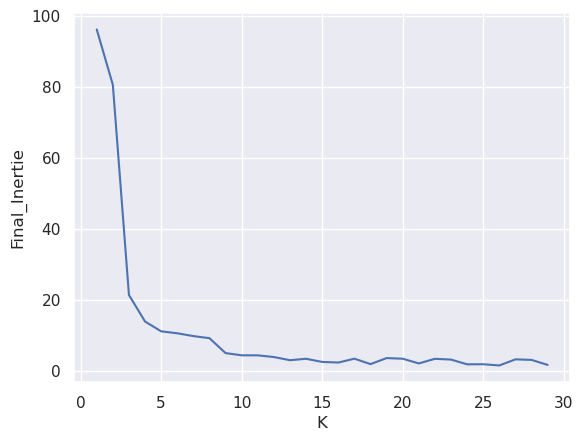

In [38]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée
l_finalInertie = []
l_k = []

for k in range(1,30):
    les_centres, l_affectation,final_inertie = clust.kmoyennes(k, data_ingredients5D_norm, 0.05, 100)
    l_finalInertie.append(final_inertie)
    l_k.append(k)
    
ut.plt.plot(l_k, l_finalInertie)
ut.plt.ylabel('Final_Inertie')
ut.plt.xlabel("K")
#plt.savefig("kmeans_intertia_ingredients.pdf", transparent=True, format="pdf")

ut.plt.show()

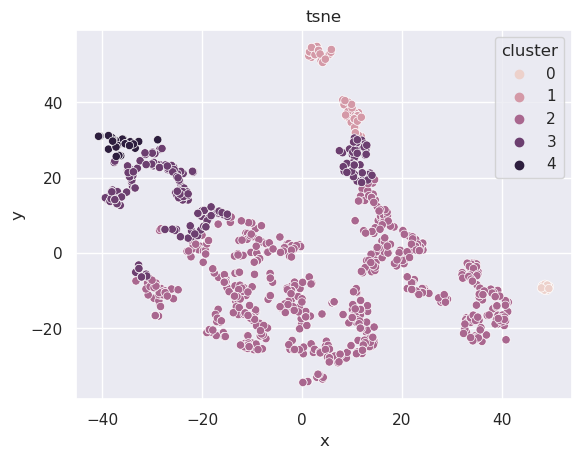

In [39]:
les_centres, l_affectation,final_inertie = clust.kmoyennes(5, data_ingredients5D_norm, 0.05, 100)
x_values = [] # X_data
y_values = [] # cluster

for cluster in l_affectation.keys():
    for j in l_affectation[cluster]:
        [selected_rows] = data_ingredients5D_norm.iloc[[j]].values.tolist()
        x_values.append(selected_rows)
        y_values.append(cluster)
#print(x_values)
#print(y_values)

x_values = np.array(x_values)
sns.set()
"""
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_values)

# t-sne 
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_values)

#affichier
df = pd.DataFrame(x_tsne, columns=['x', 'y'])
df['label'] = y_values
sns.scatterplot(x="x", y="y", hue="label", data=df)
plt.title('tsne')
plt.show()
"""
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_values)
df = pd.DataFrame(x_tsne, columns=['x', 'y'])
df['cluster'] = y_values
sns.scatterplot(x="x", y="y", hue="cluster", data=df)
plt.title('tsne')
#plt.savefig("kmeans_ingredients.pdf", transparent=True, format="pdf")

plt.show()